In [1]:
#importing necessary packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = pd.read_csv("data - data.csv")

In [3]:
train

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,...,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 7:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,2022-10-31 23:02:14,combined,combined,55,form_6,0-3 years,source_4,medium_5,False,-1,...,0,0,0,0,0,0,0,0,0,0
60291,2022-10-31 23:09:39,gmail,com,263,form_3,Fresher,source_4,medium_5,True,123,...,0,0,0,0,0,1,0,0,0,0
60292,2022-10-31 23:33:23,gmail,com,91,form_6,0-3 years,source_6,medium_6,True,507,...,0,0,0,0,0,0,0,0,0,0
60293,2022-10-31 23:48:47,gmail,com,91,form_12,0-3 years,source_4,medium_5,True,449,...,0,0,0,1,0,3,0,0,0,0


In [4]:
pd.set_option('display.max_columns',35)

In [5]:
train.dtypes

created_at           object
subdomain            object
ext                  object
country_code         object
form_type            object
experience           object
utm_source           object
utm_medium           object
is_signedup            bool
vintage               int64
weekday               int64
quarter               int64
is_weekend            int64
is_month_start         bool
is_month_end           bool
is_quarter_start       bool
is_quarter_end         bool
#leads                int64
lead_rate           float64
form_1                int64
form_6                int64
form_7                int64
form_2                int64
form_3                int64
form_4                int64
form_5                int64
form_8                int64
form_9                int64
form_10               int64
form_11               int64
form_12               int64
form_13               int64
form_14               int64
form_15               int64
buy                   int64
dtype: object

In [6]:
def check_cat_conversion(threshold = 5):
    res = []
    for j,i in enumerate(train.columns):
        val = round((train[i].nunique()/train.shape[0])*100,2)
        
        if val<=threshold and (train[i].dtypes not in ('float64','object')):
            res.append((i,val))
            #df[i] = df[i].astype('category')
        else:
            continue
    return res


In [7]:
check_cat_conversion()

[('is_signedup', 0.0),
 ('vintage', 3.91),
 ('weekday', 0.01),
 ('quarter', 0.01),
 ('is_weekend', 0.0),
 ('is_month_start', 0.0),
 ('is_month_end', 0.0),
 ('is_quarter_start', 0.0),
 ('is_quarter_end', 0.0),
 ('#leads', 0.04),
 ('form_1', 0.02),
 ('form_6', 0.02),
 ('form_7', 0.01),
 ('form_2', 0.0),
 ('form_3', 0.01),
 ('form_4', 0.0),
 ('form_5', 0.01),
 ('form_8', 0.03),
 ('form_9', 0.0),
 ('form_10', 0.01),
 ('form_11', 0.0),
 ('form_12', 0.02),
 ('form_13', 0.01),
 ('form_14', 0.01),
 ('form_15', 0.01),
 ('buy', 0.0)]

* is_signedup,vintage,weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end  has to be converted to a category but with some more investigation
* form 1 to 15 left as it is i.e integer because it is already a number but we might have to feature scale it
* vintage has to be investigated further
# Action Points
* change the datatype of created_At to datetime
* subdomain to category
* ext to category
* country to category
* formtype to category
* ext to category
*  is_month_Start to category
* is_month_end to category
* is_Quarter_end to category
* is_quarter_start to category

In [8]:
res = []
for i in train.columns:
    if (train[i].dtypes == 'object') or (train[i].dtypes == 'bool'):
        res.append(i)

In [9]:
res

['created_at',
 'subdomain',
 'ext',
 'country_code',
 'form_type',
 'experience',
 'utm_source',
 'utm_medium',
 'is_signedup',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end']

* implementing sction points

In [10]:
for i in res:
    train[i] = train[i].astype('category')

In [11]:
train.dtypes

created_at          category
subdomain           category
ext                 category
country_code        category
form_type           category
experience          category
utm_source          category
utm_medium          category
is_signedup         category
vintage                int64
weekday                int64
quarter                int64
is_weekend             int64
is_month_start      category
is_month_end        category
is_quarter_start    category
is_quarter_end      category
#leads                 int64
lead_rate            float64
form_1                 int64
form_6                 int64
form_7                 int64
form_2                 int64
form_3                 int64
form_4                 int64
form_5                 int64
form_8                 int64
form_9                 int64
form_10                int64
form_11                int64
form_12                int64
form_13                int64
form_14                int64
form_15                int64
buy           

In [12]:
train['created_at'] = pd.to_datetime(train['created_at'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60295 entries, 0 to 60294
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   created_at        60295 non-null  datetime64[ns]
 1   subdomain         60295 non-null  category      
 2   ext               60295 non-null  category      
 3   country_code      60295 non-null  category      
 4   form_type         60295 non-null  category      
 5   experience        60295 non-null  category      
 6   utm_source        60295 non-null  category      
 7   utm_medium        60295 non-null  category      
 8   is_signedup       60295 non-null  category      
 9   vintage           60295 non-null  int64         
 10  weekday           60295 non-null  int64         
 11  quarter           60295 non-null  int64         
 12  is_weekend        60295 non-null  int64         
 13  is_month_start    60295 non-null  category      
 14  is_month_end      6029

* no null values 

In [14]:
train.describe()

,vintage,weekday,quarter,is_weekend,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
count,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000
mean,264.890721,2.832722,2.548271,0.234630,1.563397,1.071697,0.238942,0.544772,0.240186,0.007364,0.091052,0.022887,0.129132,0.023053,0.004262,0.011261,0.010565,0.201940,0.011129,0.002985,0.023866,0.016403
std,450.987595,1.920341,1.033660,0.423771,1.124497,0.749539,0.524273,0.632525,0.472827,0.088546,0.303290,0.152620,0.365407,0.357732,0.066906,0.115142,0.105907,0.546616,0.111496,0.056645,0.205679,0.127019
min,-1.000000,0.000000,1.000000,0.000000,1.000000,0.001513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,328.000000,4.000000,3.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2831.000000,6.000000,4.000000,1.000000,26.000000,20.000000,20.000000,19.000000,6.000000,2.000000,5.000000,2.000000,7.000000,26.000000,2.000000,4.000000,2.000000,16.000000,3.000000,3.000000,6.000000,1.000000


# vintage
* mean >> median a right skewed graph in the data  and the standard deviation is high so data is not well distributed and mean < standard deviation the normal curve will be a bit flattened and range of the data is -1 to 2831 outliers are present
# weekday
* mean < median a left skewed graph in the data  and the standard deviation is less so data is well distributed and mean > standard deviation the normal curve will be a peak and range of the data is 0 to 6 outliers are present here we hv to make assumption that 0 for Sunday and 1 for Monday
# quarter
* similar trend can be concluded using the same concept for quarter, is_weekend, Form_1 to form_15 
# leads
* mean > median a slight right skewed graph in the data  and the standard deviation is less so data is  well distributed and mean < standard deviation the normal curve will be a peak and range of the data is 1 to 26 outliers are present
# lead_rate
* mean > median a slightright skewed graph in the data  and the standard deviation is less so data is  well distributed and mean < standard deviation the normal curve will be a peak and range of the data is 0.00 to 20 outliers are present

In [15]:
train

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 07:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,4,1,0,True,False,True,False,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,4,1,0,True,False,True,False,1,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,4,1,0,True,False,True,False,4,4.000000,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,4,1,0,True,False,True,False,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,4,1,0,True,False,True,False,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,2022-10-31 23:02:14,combined,combined,55,form_6,0-3 years,source_4,medium_5,False,-1,0,4,0,False,True,False,False,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60291,2022-10-31 23:09:39,gmail,com,263,form_3,Fresher,source_4,medium_5,True,123,0,4,0,False,True,False,False,2,0.060606,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
60292,2022-10-31 23:33:23,gmail,com,91,form_6,0-3 years,source_6,medium_6,True,507,0,4,0,False,True,False,False,1,0.002421,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60293,2022-10-31 23:48:47,gmail,com,91,form_12,0-3 years,source_4,medium_5,True,449,0,4,0,False,True,False,False,5,0.028090,0,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0


In [16]:
def UVA_category(data,var_group):
    """
    Univariate analysis categorical 
    takes a group of variables(category) and plot/print all the value counts and barplot
    """
    #setting figure size
    size = len(var_group)
    plt.figure(figsize = (7*size,5),dpi = 140)
    
    for j,i in enumerate(var_group):
        norm_count =  data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
        
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count,norm_count.index,order = norm_count.index)
        plt.xlabel('fraction/percent',fontsize = 20)
        plt.ylabel('{}'.format(i),fontsize=20)
        plt.title('n_uniques = {} \n value counts \n{};'.format(n_uni,norm_count))

In [17]:
def UVA_numeric(data,var_group):
    """
    Univariate Numerical Anlaysis and plot/print all descriptives and properties along with KDE
    input dataframe, variable group
    returns a loop: calculates all the descriptives of ith variable plots/prints it
    """
    size = len(var_group)
    plt.figure(figsize = (7*size,3),dpi = 140)
    
    #looping each variable group
    for j,i in enumerate(var_group):
        
        #calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calculating points of standard_deviation 
        points = mean - st_dev,mean + st_dev
        
        #potting the variable with every piece of information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade = True)
        sns.lineplot(points,[0,0],color = 'black',label = 'std_dev')
        sns.scatterplot([mini,maxi],[0,0],color = 'orange',label ="min/max")
        sns.scatterplot([mean],[0],color = 'red', label = 'mean')
        sns.scatterplot([median],[0],color = 'blue',label = 'median')
        plt.xlabel('{}'.format(i),fontsize=20)
        plt.ylabel('Density')
        plt.title('std_dev = {}; kurtosis = {}; \nskew = {}; range = {}; \nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                         round(kurt,2),
                                                                                                         round(skew,2),
                                                                                                         (round(mini,2),round(maxi,2)),
                                                                                                         round(mean,2),
                                                                                                         round(median,2)))

In [18]:
train.dtypes

created_at          datetime64[ns]
subdomain                 category
ext                       category
country_code              category
form_type                 category
experience                category
utm_source                category
utm_medium                category
is_signedup               category
vintage                      int64
weekday                      int64
quarter                      int64
is_weekend                   int64
is_month_start            category
is_month_end              category
is_quarter_start          category
is_quarter_end            category
#leads                       int64
lead_rate                  float64
form_1                       int64
form_6                       int64
form_7                       int64
form_2                       int64
form_3                       int64
form_4                       int64
form_5                       int64
form_8                       int64
form_9                       int64
form_10             

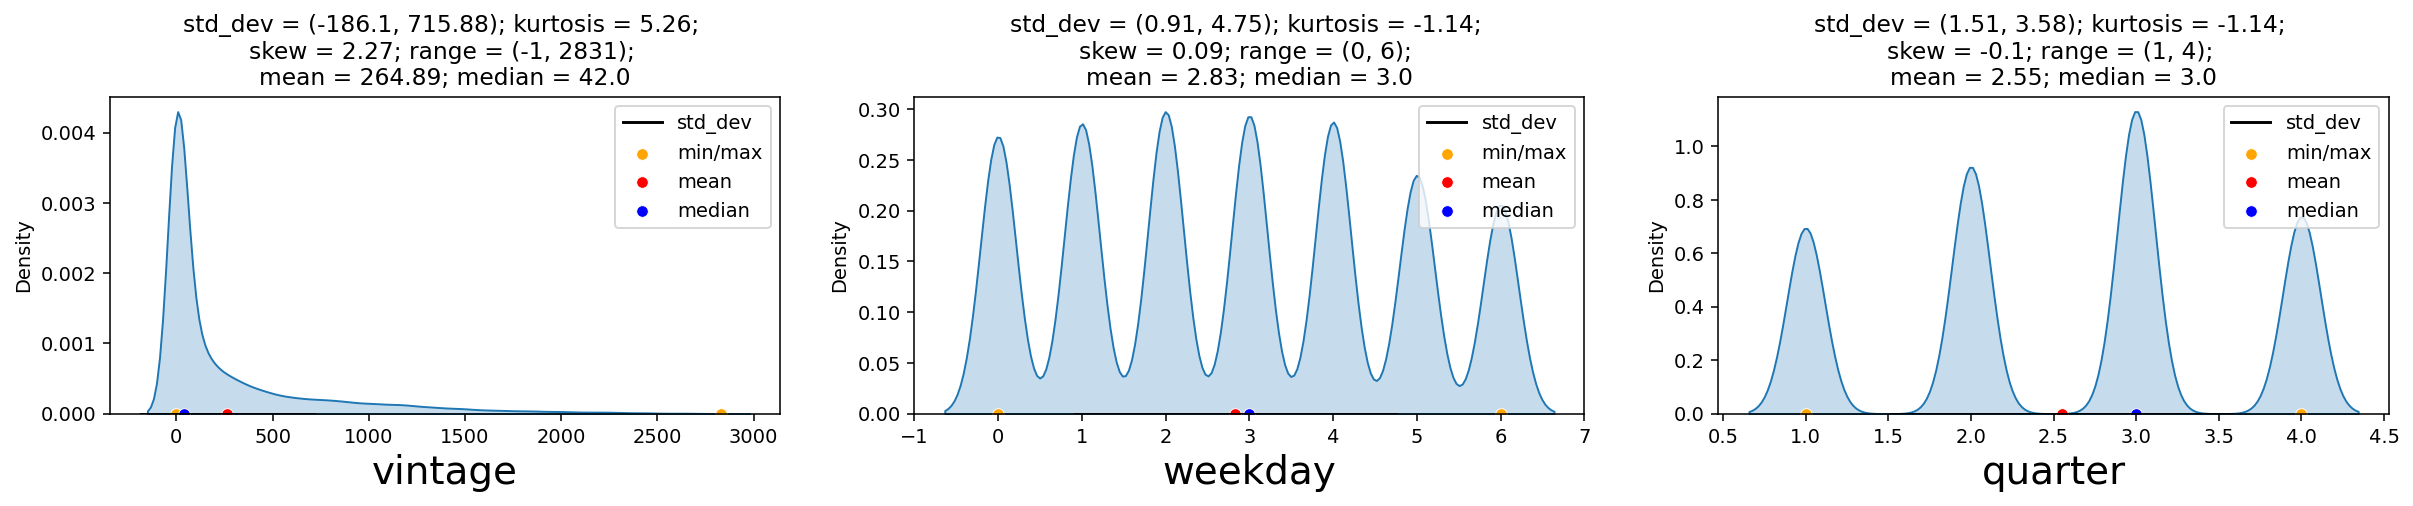

In [19]:
UVA_numeric(train,['vintage','weekday','quarter'])

* weekday and quarter are categories and they are already may be a feature scaling is just needed
* as told earlier vintage will be right skewed graph with outliers

In [20]:
category = []
for i in train.columns:
    if (train[i].dtypes == "category"):
        category.append(i)
        
numeric = []
for i in train.columns:
    if (train[i].dtypes == "float64") or (train[i].dtypes == "int64"):
        numeric.append(i)

In [21]:
category

['subdomain',
 'ext',
 'country_code',
 'form_type',
 'experience',
 'utm_source',
 'utm_medium',
 'is_signedup',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end']

In [22]:
numeric

['vintage',
 'weekday',
 'quarter',
 'is_weekend',
 '#leads',
 'lead_rate',
 'form_1',
 'form_6',
 'form_7',
 'form_2',
 'form_3',
 'form_4',
 'form_5',
 'form_8',
 'form_9',
 'form_10',
 'form_11',
 'form_12',
 'form_13',
 'form_14',
 'form_15',
 'buy']

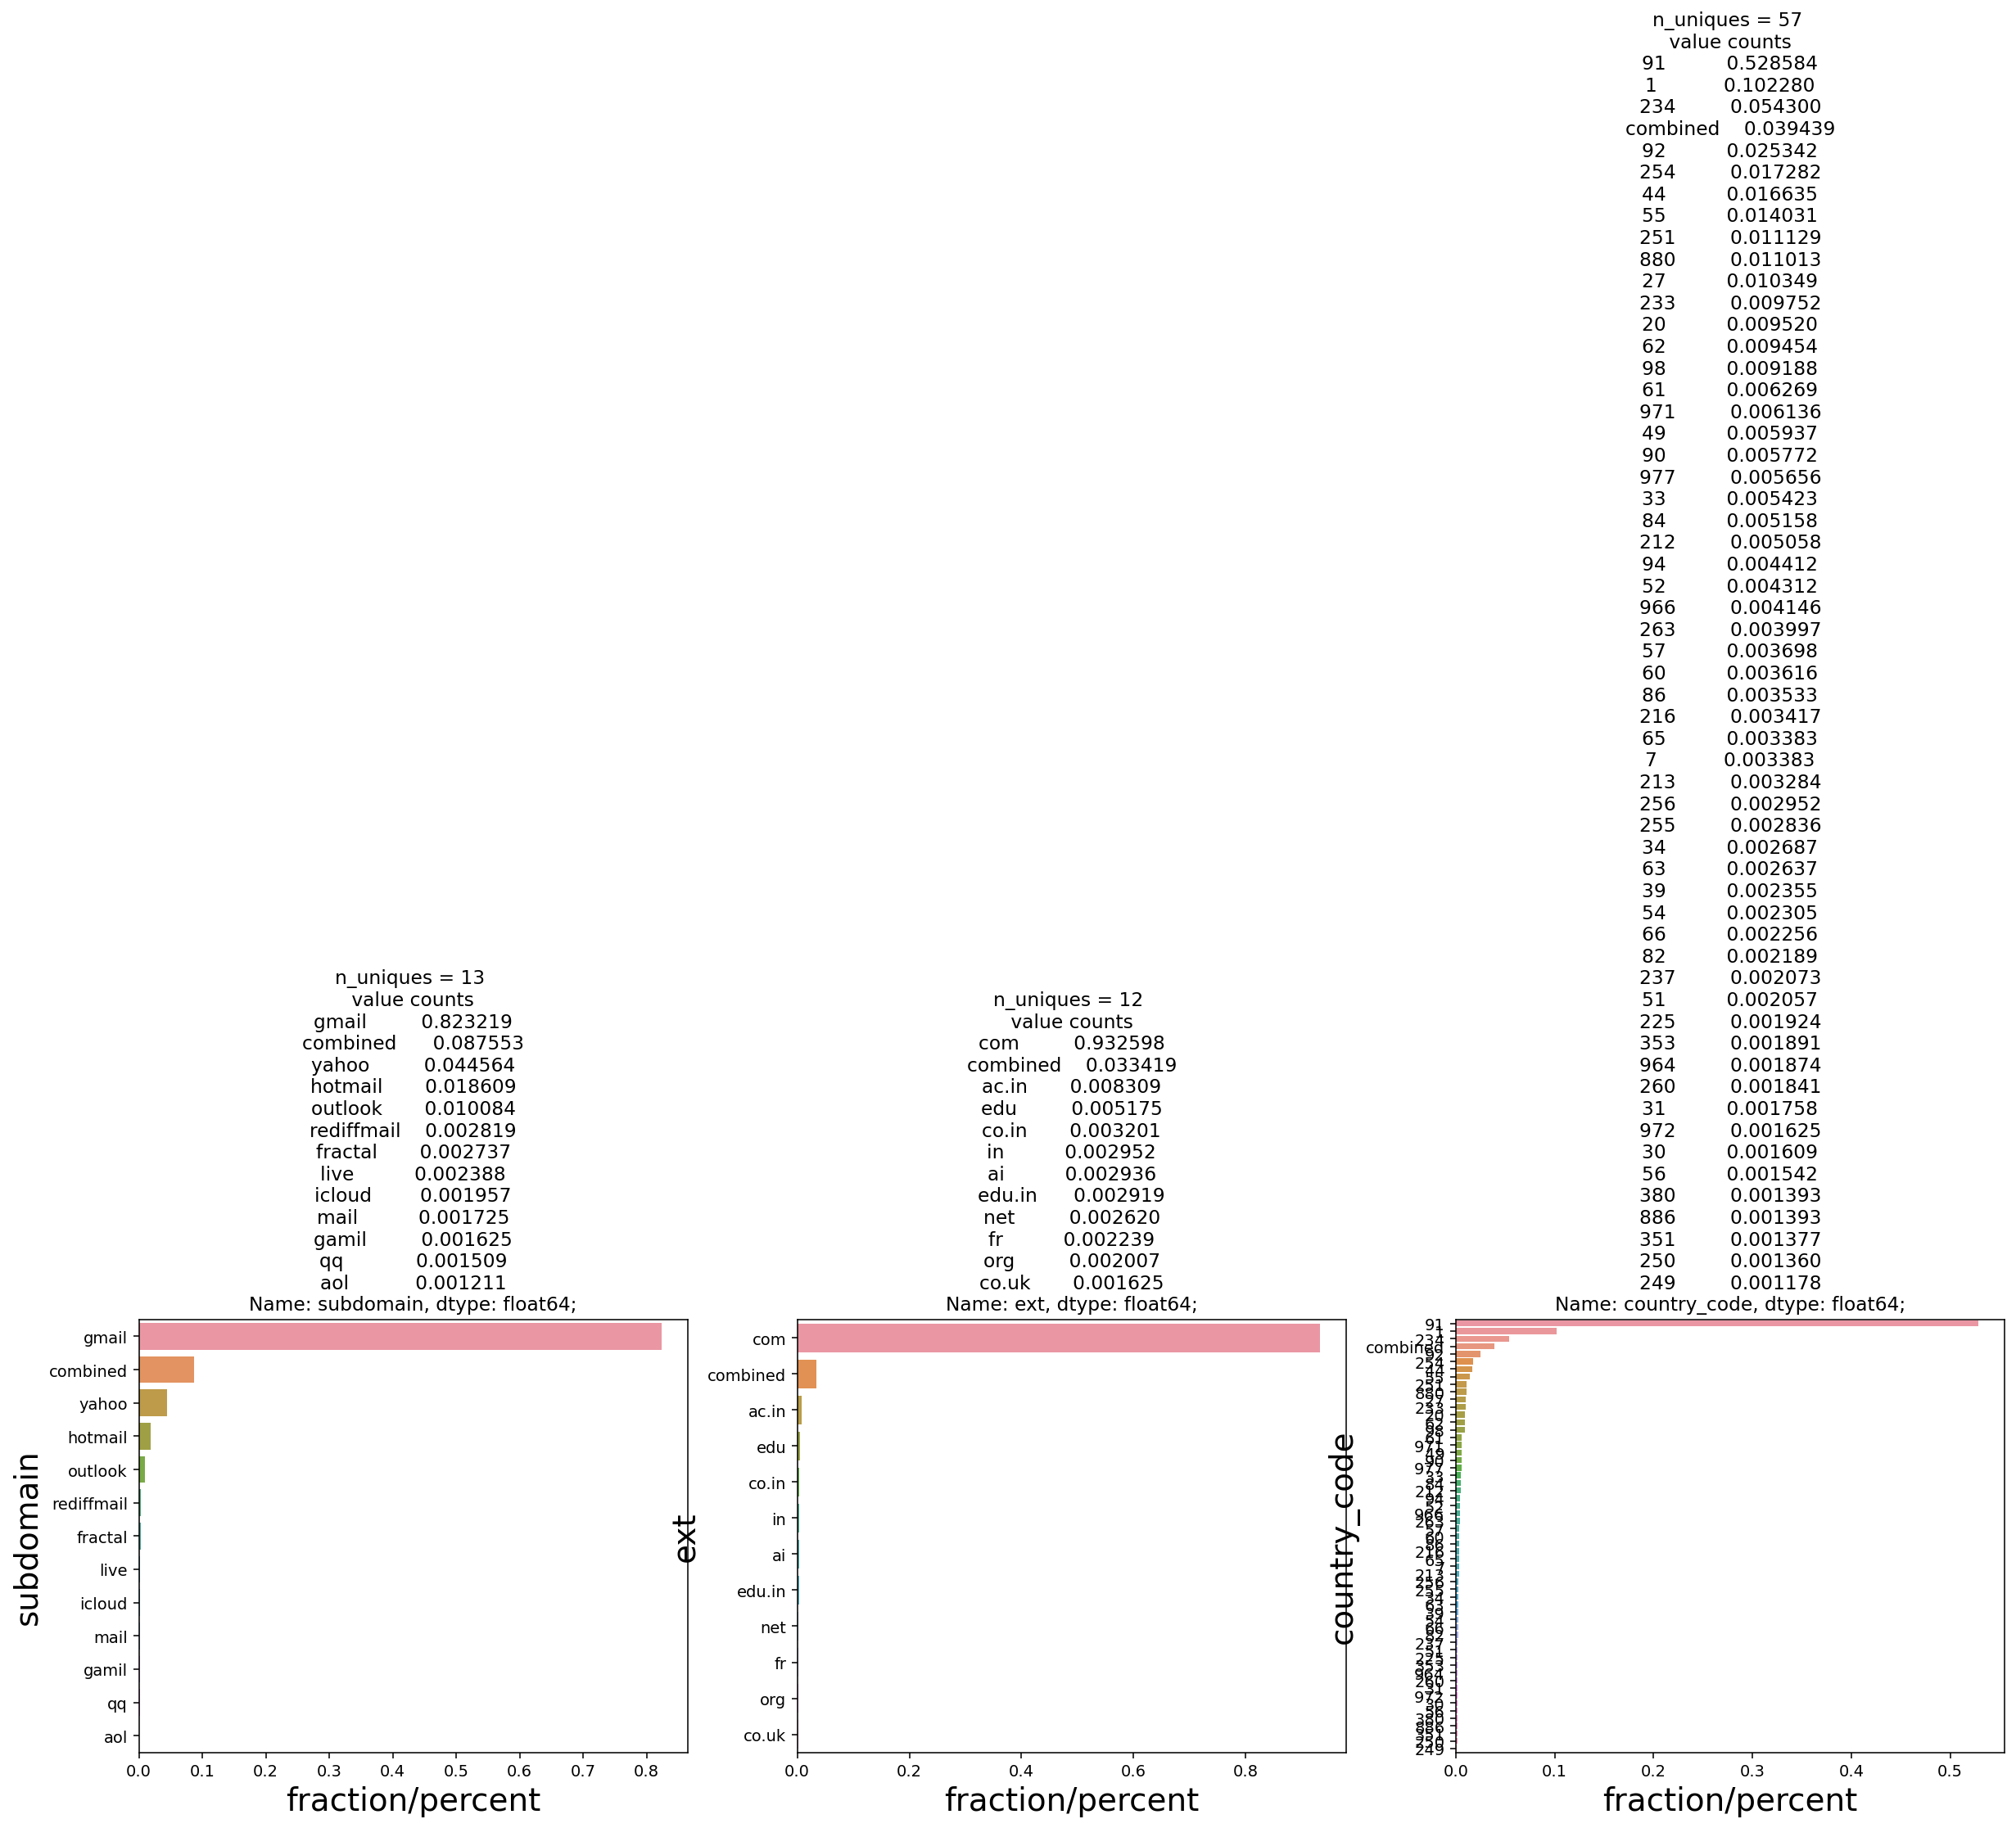

In [23]:
UVA_category(train,category[:3])

* there are many categories only frequency encoding would help one hot encoding might result in curse of dimensionality

In [24]:
len(category)

12

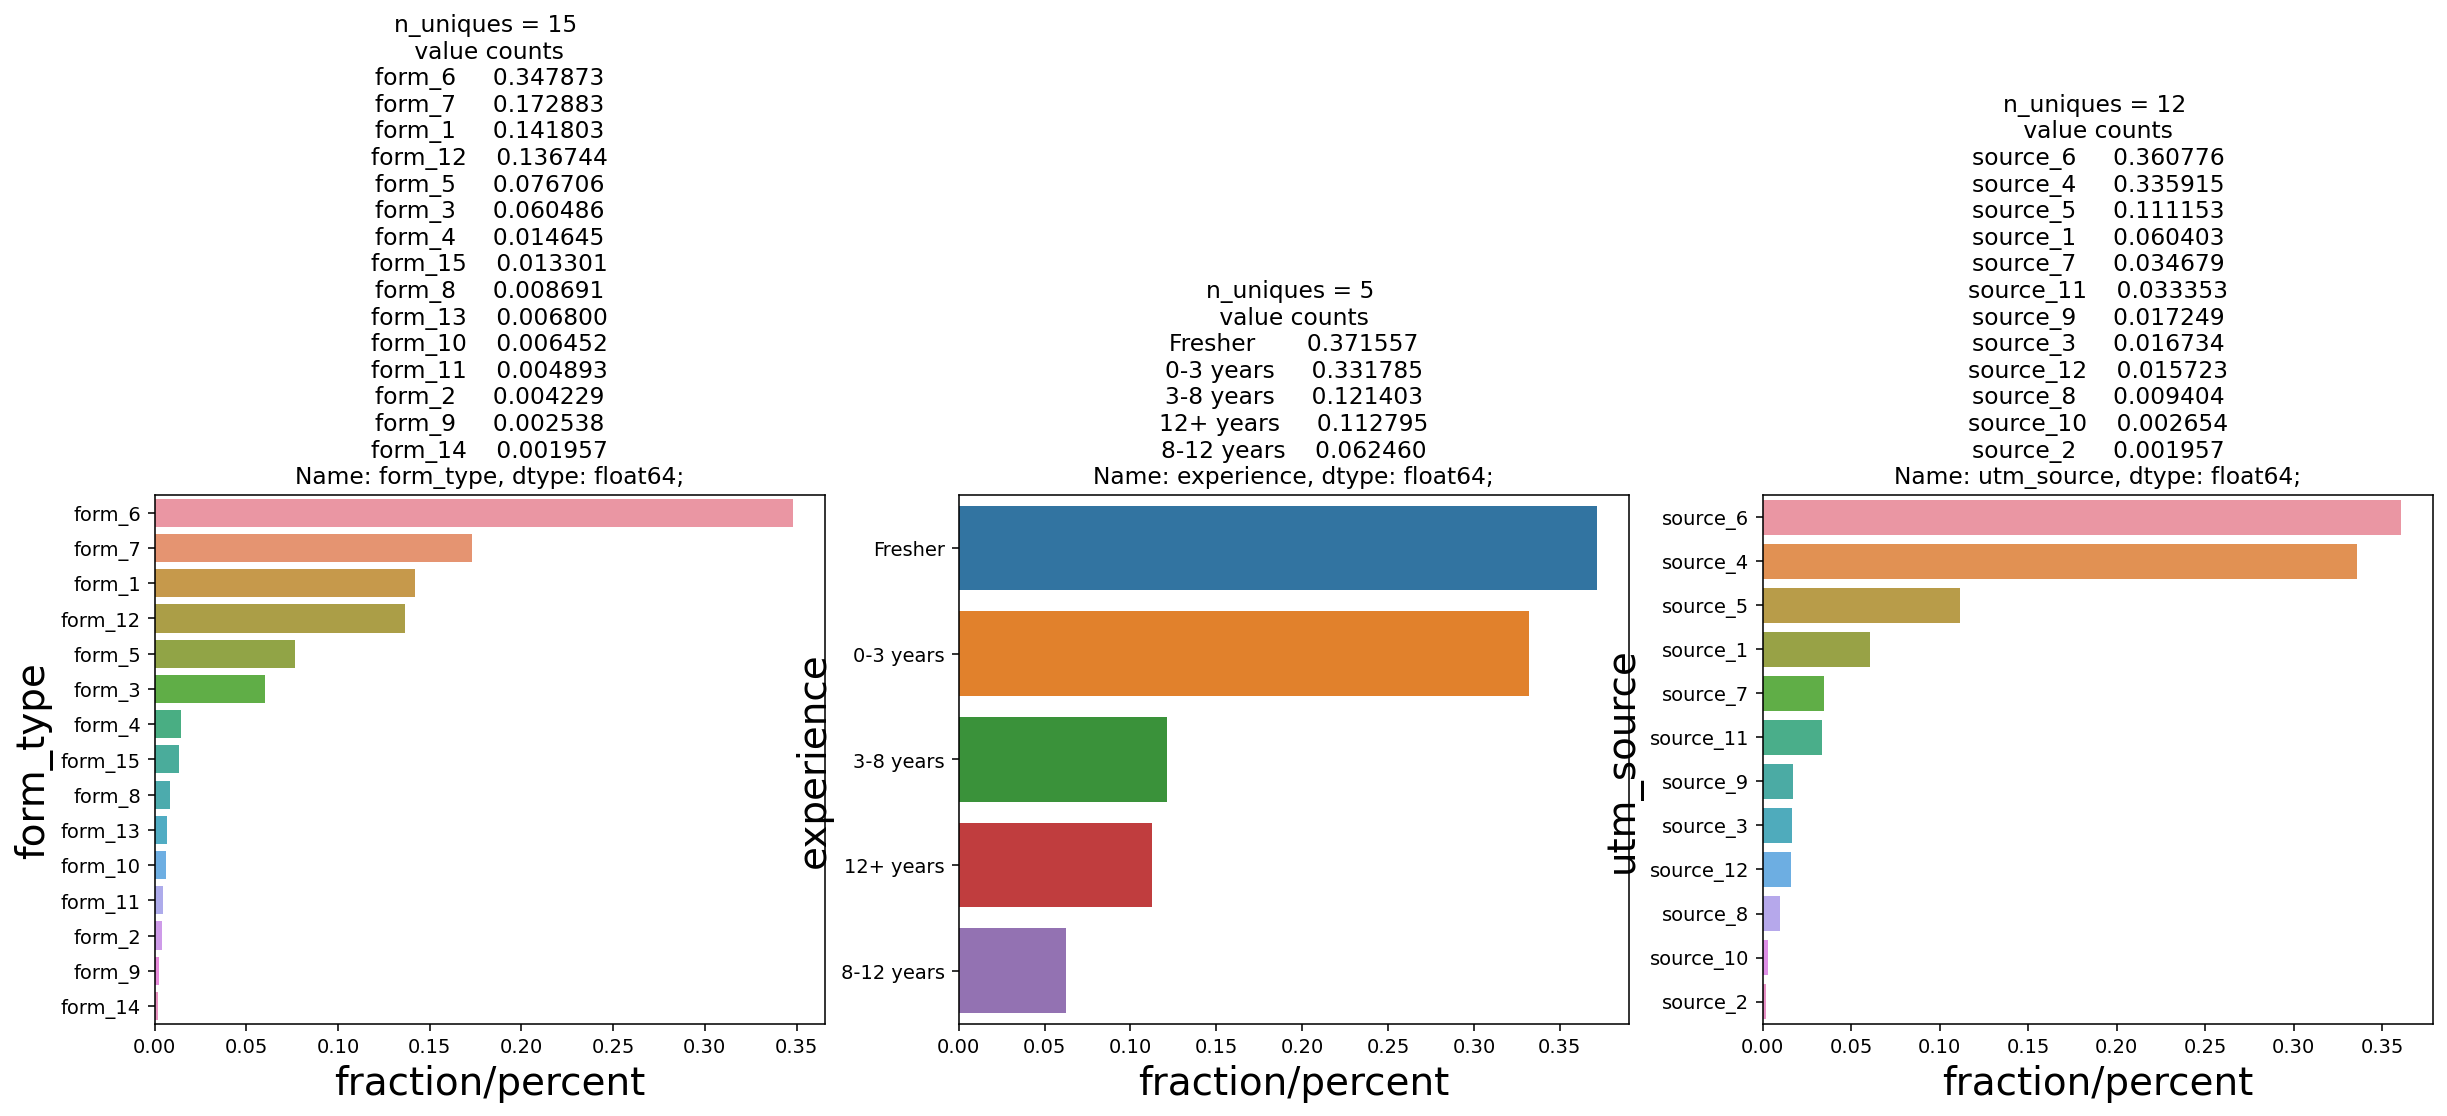

In [25]:
UVA_category(train,category[3:6])

* frequency encoding

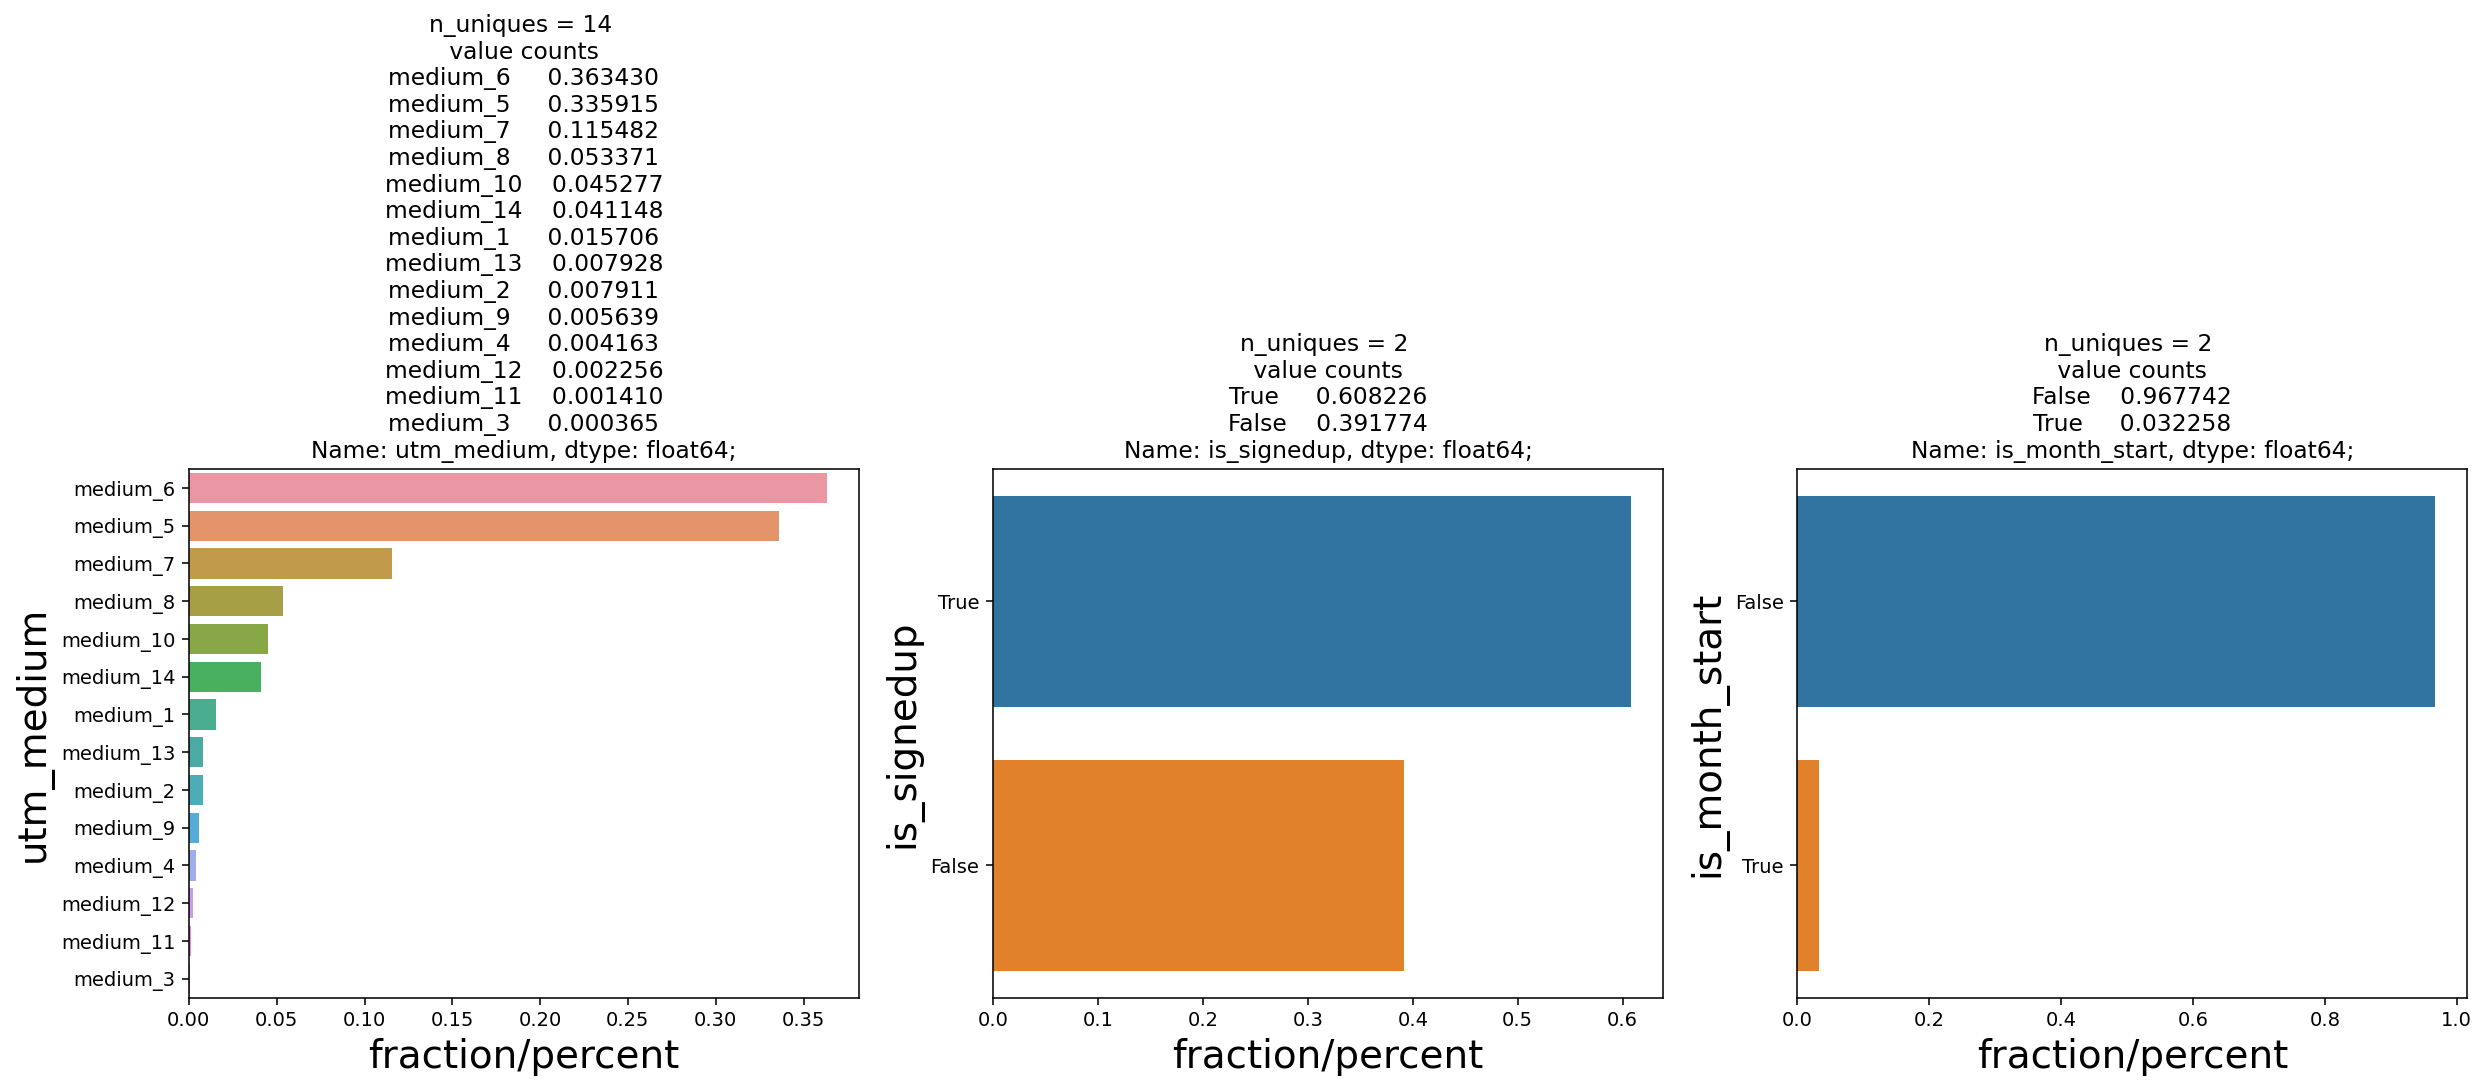

In [26]:
UVA_category(train,category[6:9])

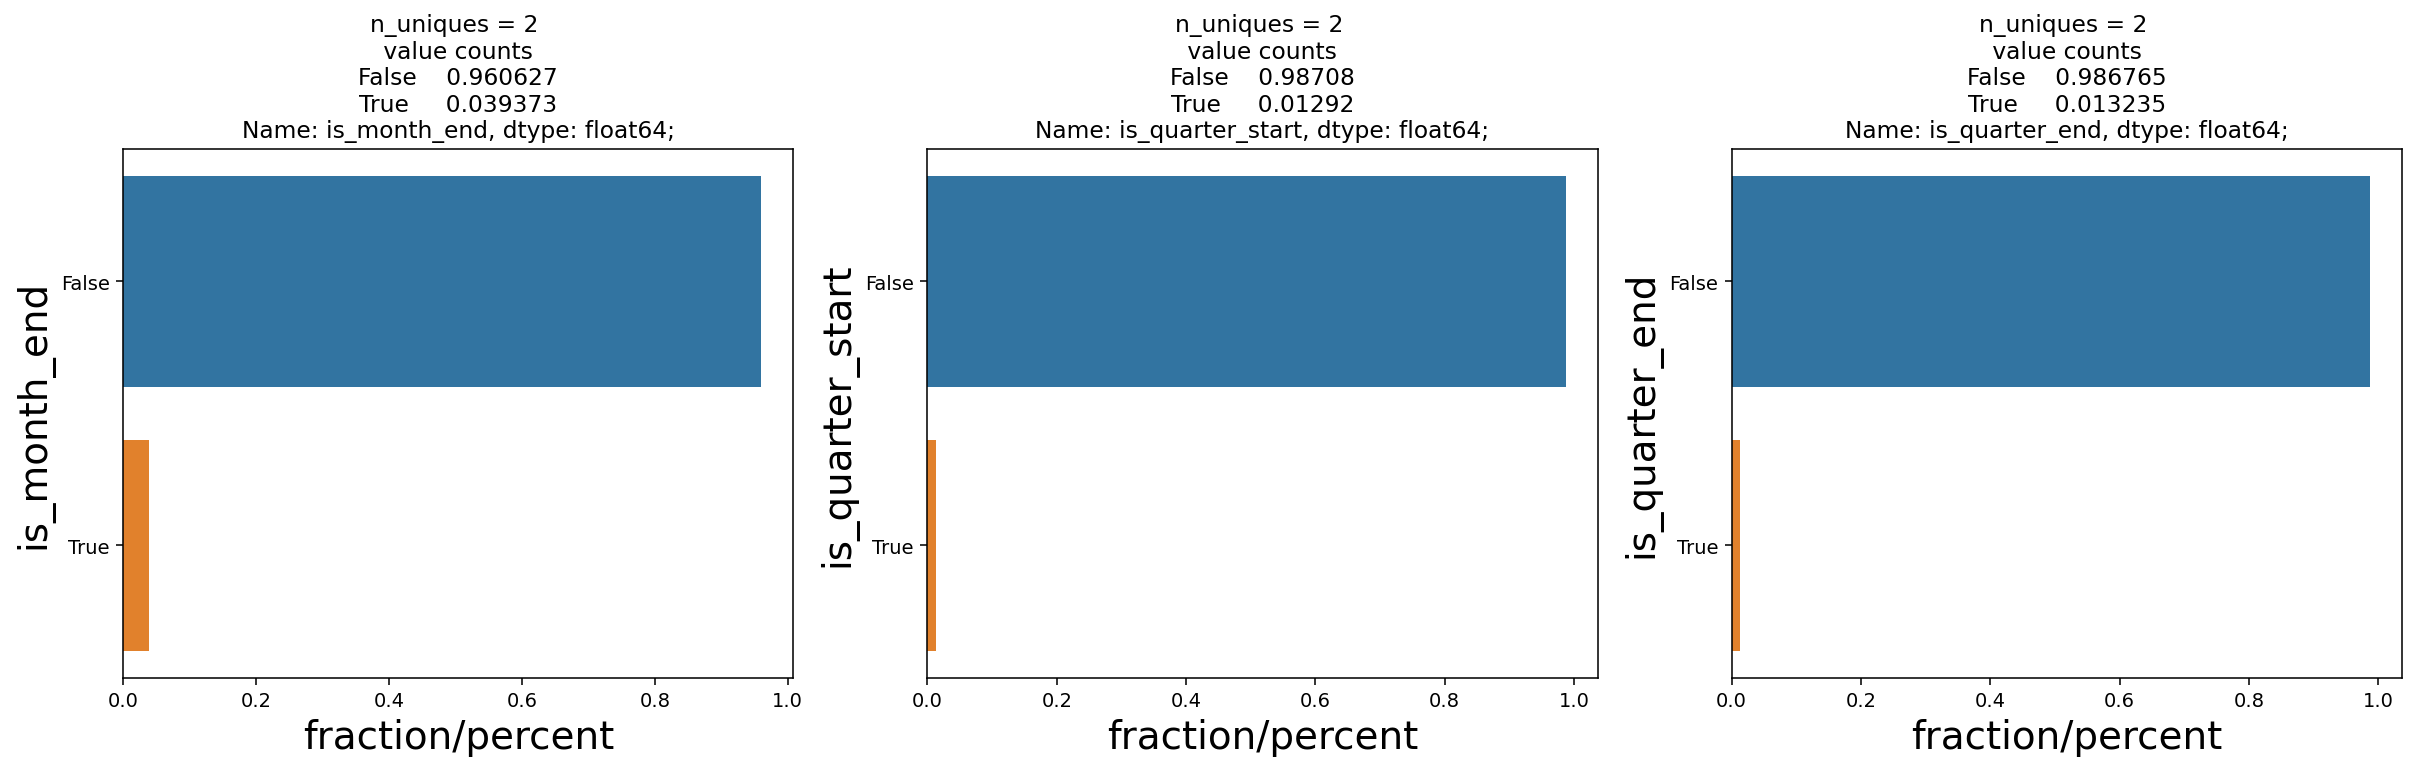

In [27]:
UVA_category(train,category[9:])

* columns like is_month_statrt,is_month_end,is_quarter_end, is_quarter_start due to very low variance we can drop these but these can be point of interest as well so I'll train my with these features and without these features

In [28]:
len(numeric)

22

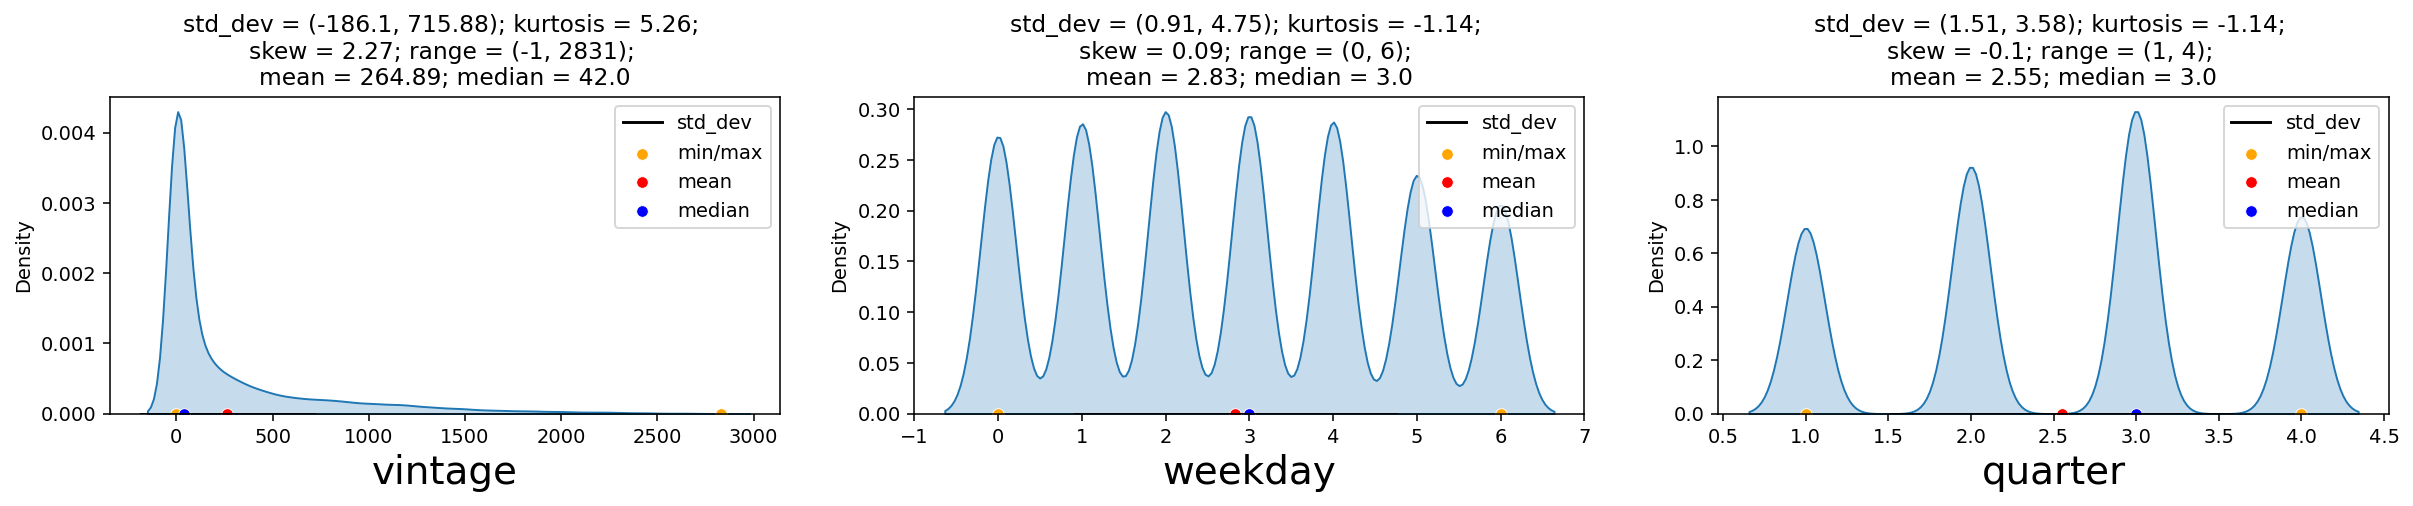

In [29]:
UVA_numeric(train,numeric[:3])

* outliers are present in vintage but rest are i.e weekday and quarter do not have due to the fact that they are week days and quarter

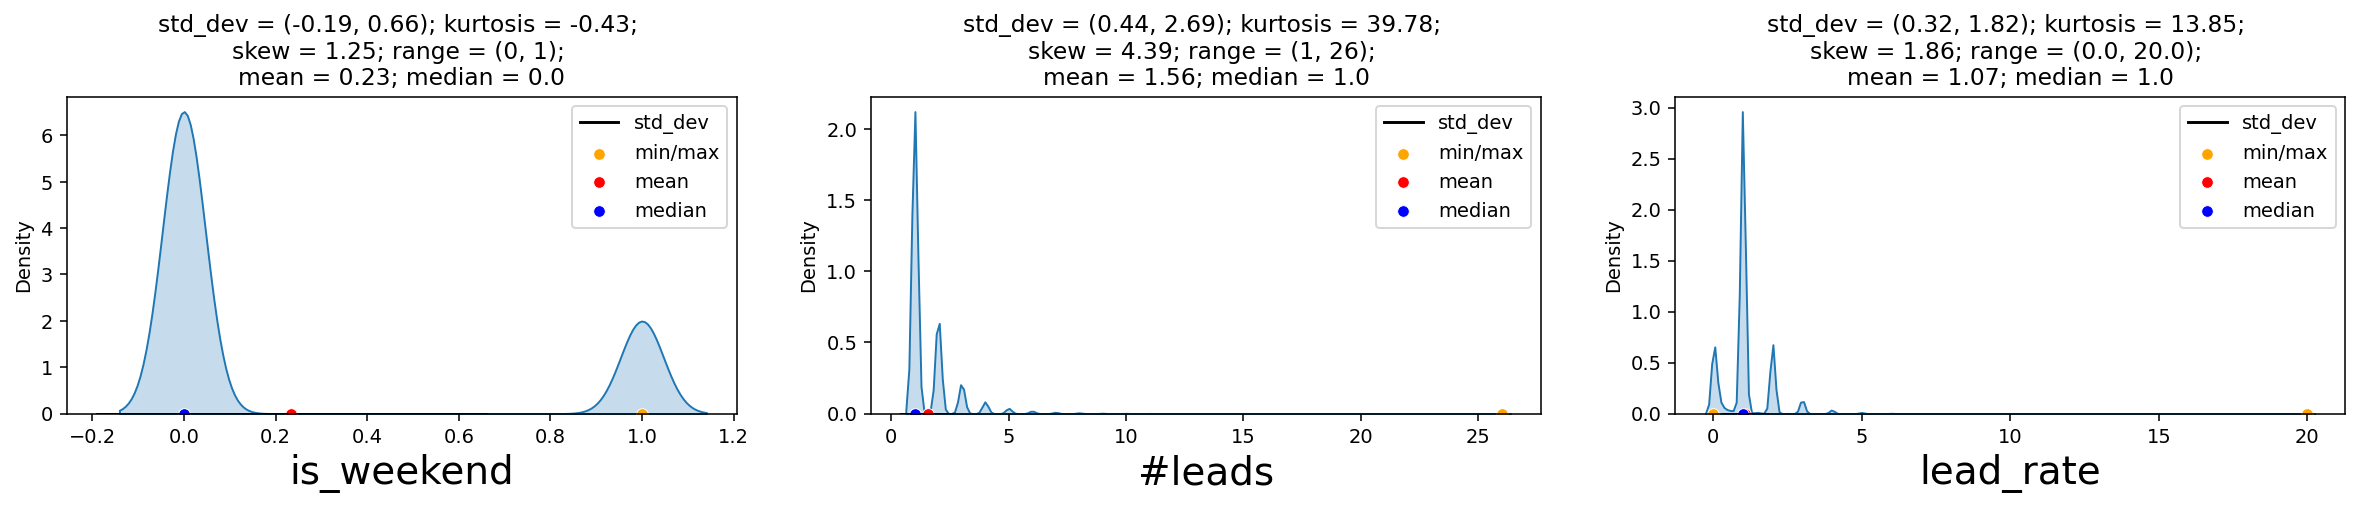

In [30]:
UVA_numeric(train,numeric[3:6])

* all the prediction is visually verified
* #leads and lead_rate has outliers but cannot remove them because they can be my point of interest and might be useful in further analysis


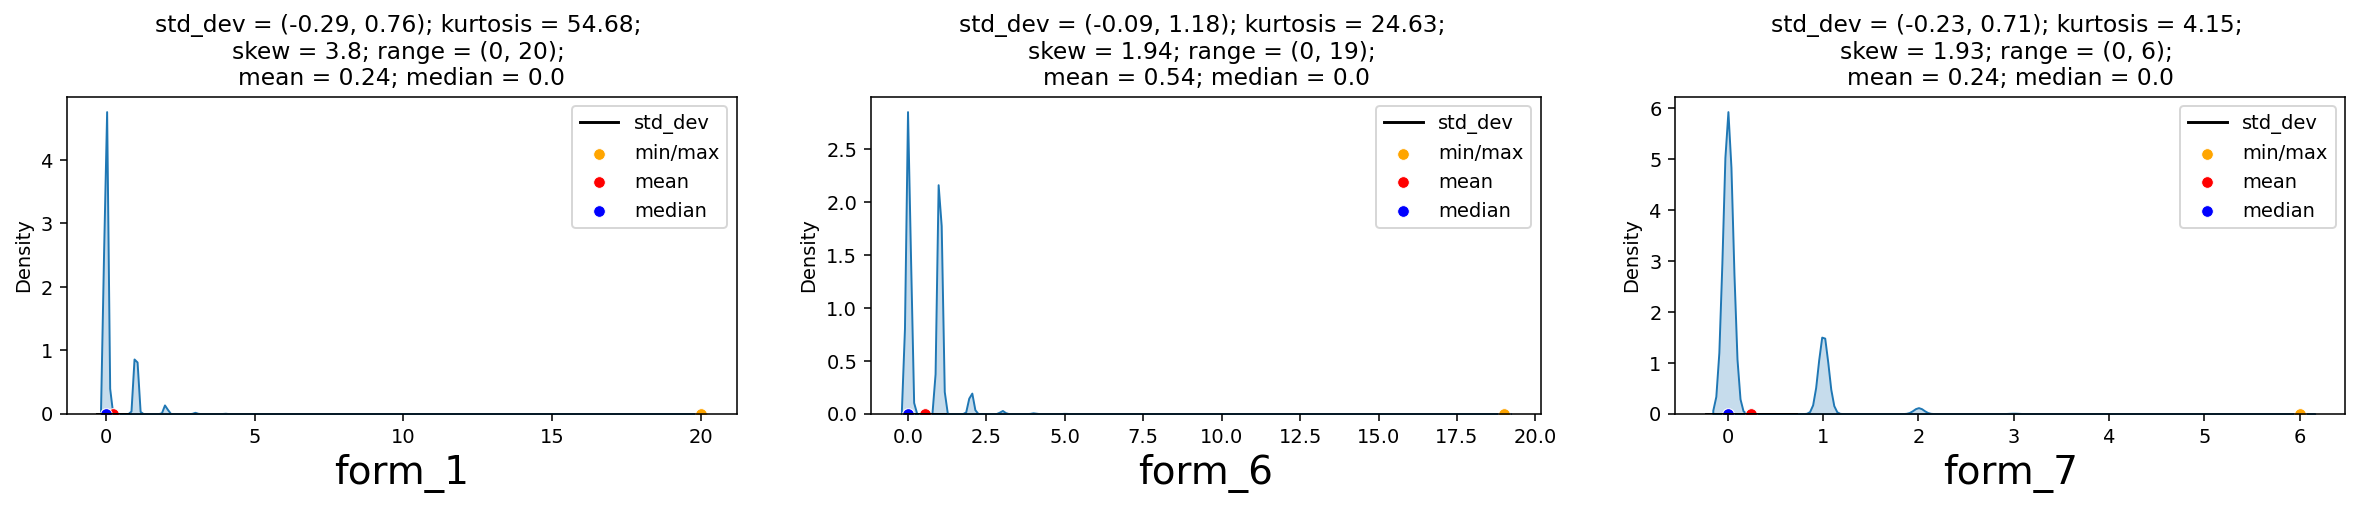

In [31]:
UVA_numeric(train,numeric[6:9])

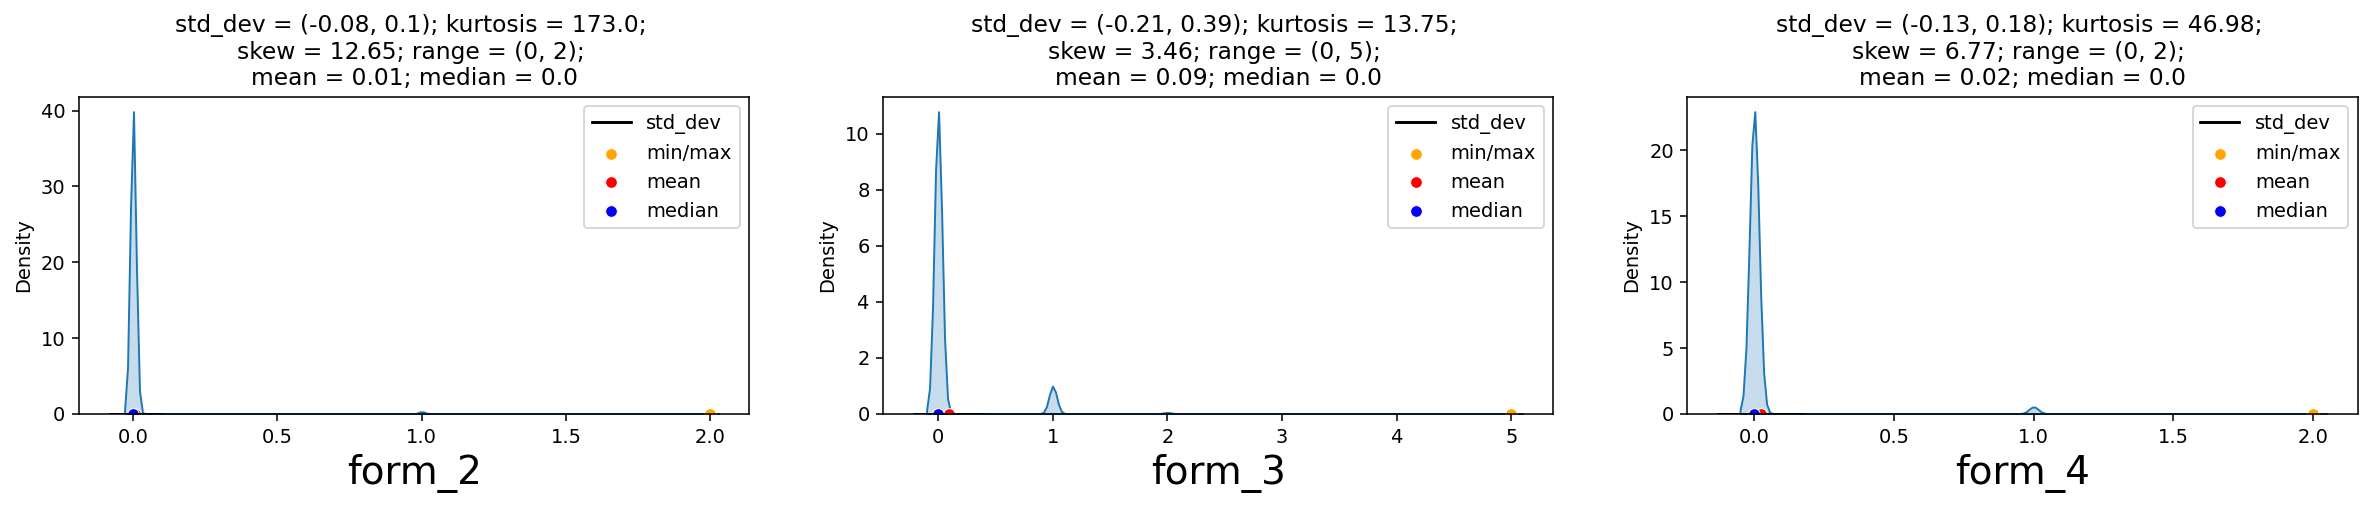

In [32]:
UVA_numeric(train,numeric[9:12])

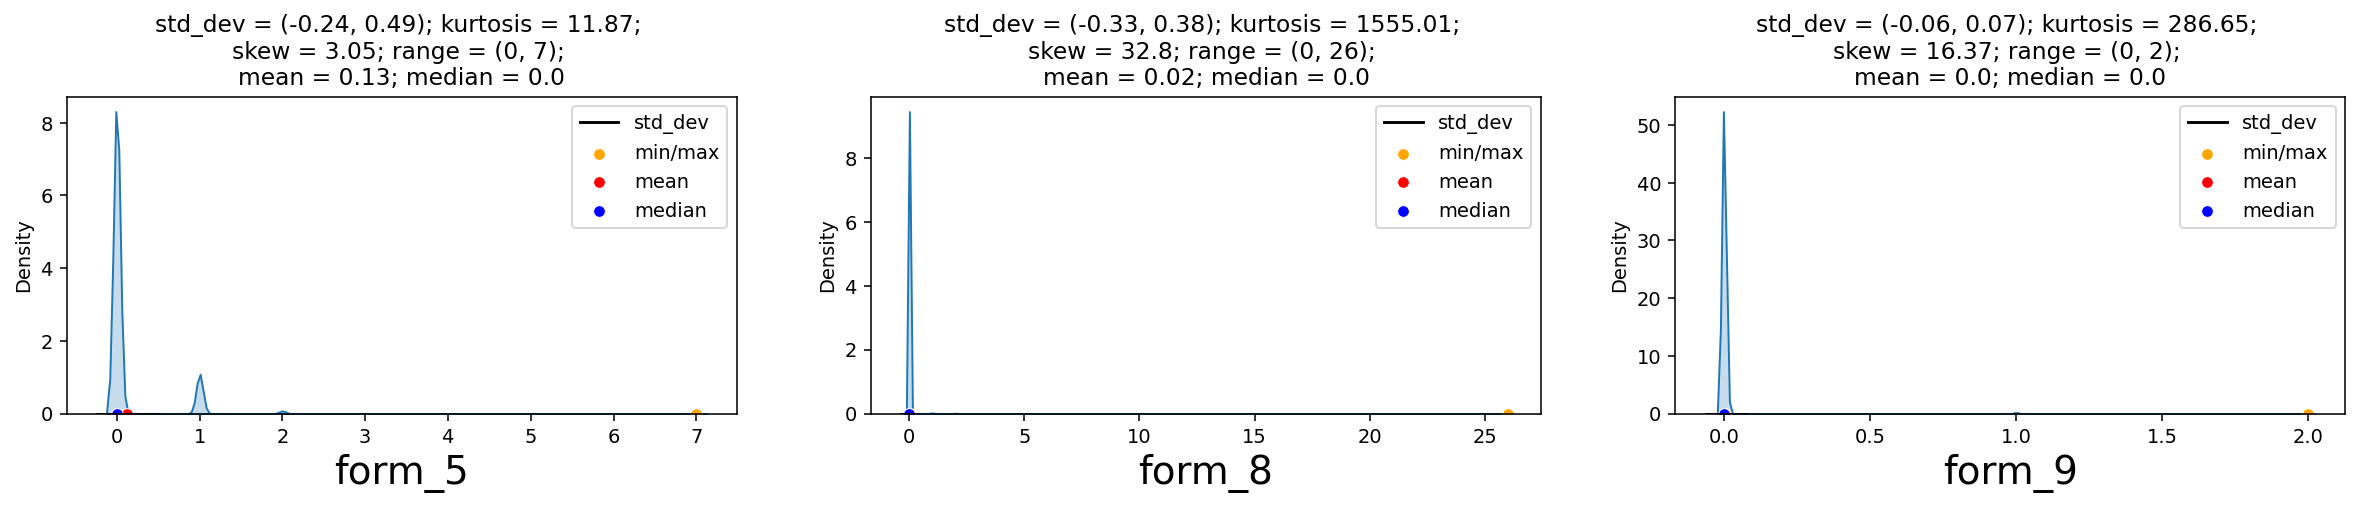

In [33]:
UVA_numeric(train,numeric[12:15])

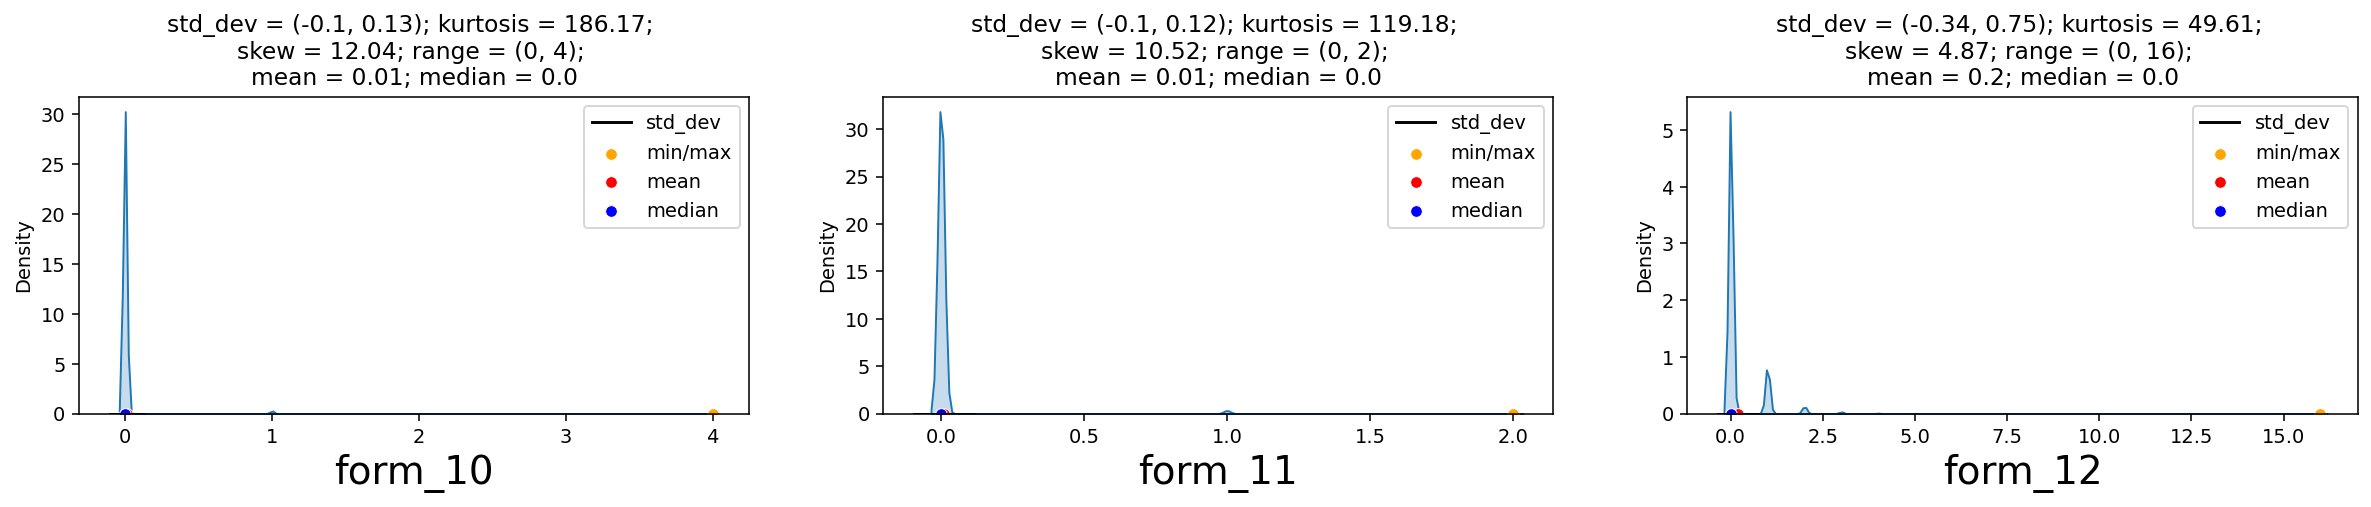

In [34]:
UVA_numeric(train,numeric[15:18])

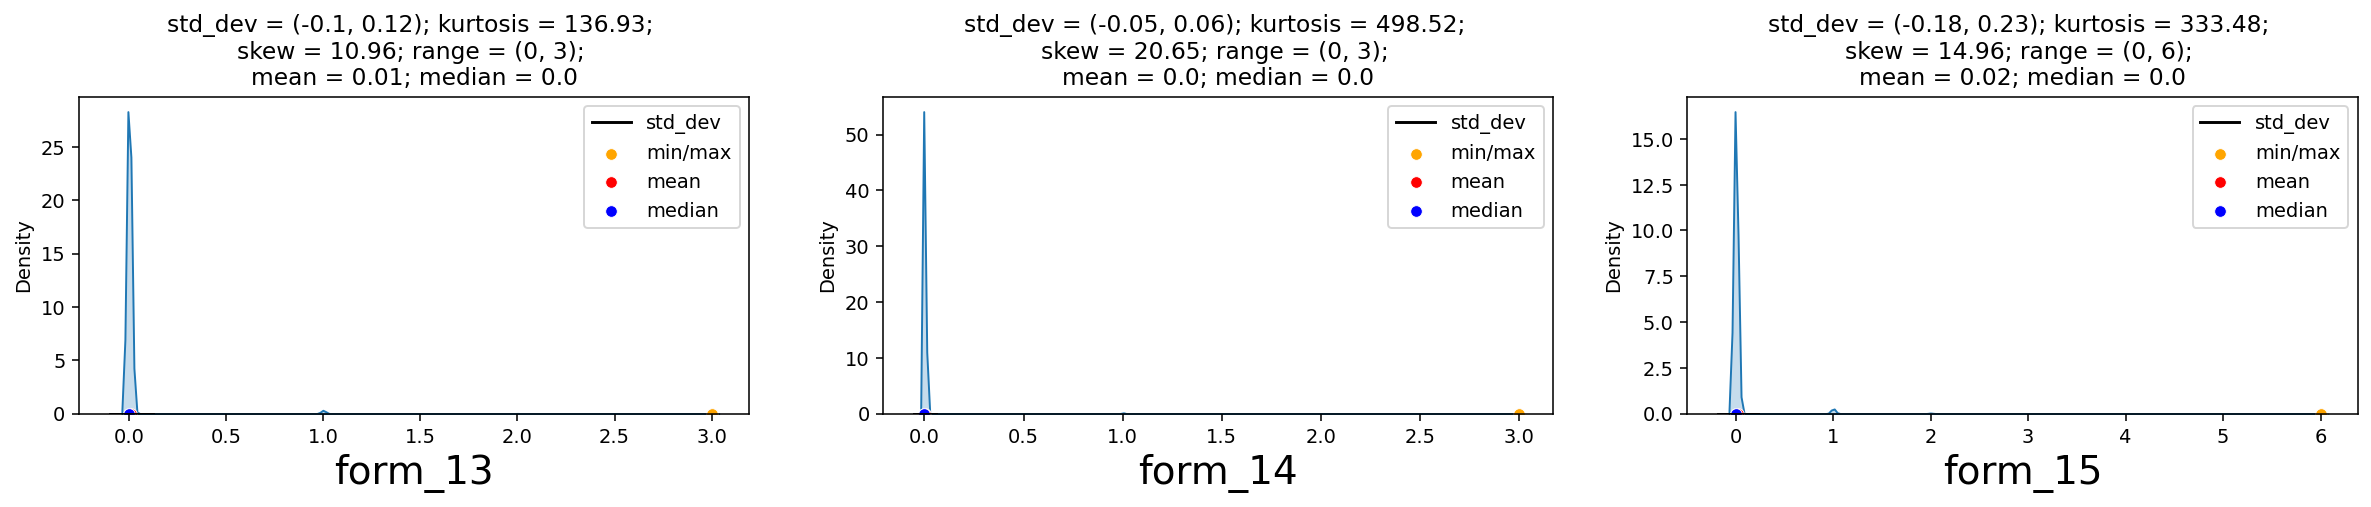

In [35]:
UVA_numeric(train,numeric[18:21])

* all the forms are important so cannot remove them 

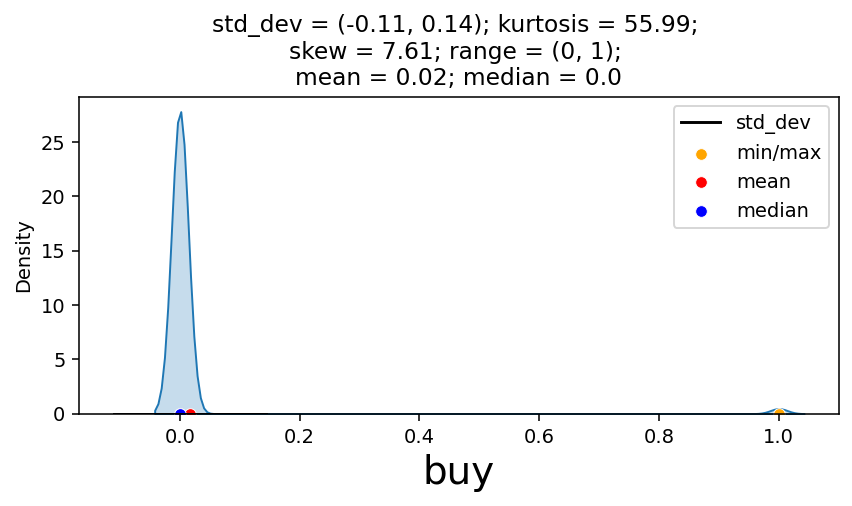

In [36]:

UVA_numeric(train,numeric[21:])

* clearly theres a class imblance in the target variable we hv to balance this 70 - 30 or 60 -40

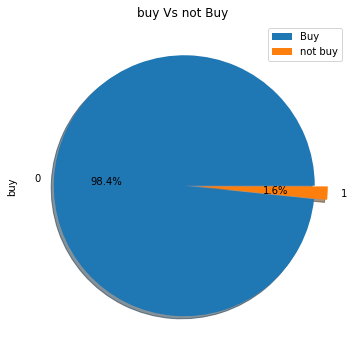

In [37]:
train['buy'].value_counts().plot(kind = 'pie',figsize = (6,6), explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
plt.title('buy Vs not Buy ')
plt.legend(['Buy','not buy'])
plt.show()

In [38]:
train

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 07:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,4,1,0,True,False,True,False,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,4,1,0,True,False,True,False,1,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,4,1,0,True,False,True,False,4,4.000000,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,4,1,0,True,False,True,False,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,4,1,0,True,False,True,False,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,2022-10-31 23:02:14,combined,combined,55,form_6,0-3 years,source_4,medium_5,False,-1,0,4,0,False,True,False,False,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60291,2022-10-31 23:09:39,gmail,com,263,form_3,Fresher,source_4,medium_5,True,123,0,4,0,False,True,False,False,2,0.060606,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
60292,2022-10-31 23:33:23,gmail,com,91,form_6,0-3 years,source_6,medium_6,True,507,0,4,0,False,True,False,False,1,0.002421,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60293,2022-10-31 23:48:47,gmail,com,91,form_12,0-3 years,source_4,medium_5,True,449,0,4,0,False,True,False,False,5,0.028090,0,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0


* boolean values should be replaced with 0 and 1 because it will less computationally expensive then performing any encoding

In [39]:
train['is_signedup'].replace('True',1,inplace=True)

In [40]:
train['is_signedup']=train['is_signedup'].astype('int')

In [41]:
train['is_signedup']

0        0
1        1
2        1
3        0
4        1
        ..
60290    0
60291    1
60292    1
60293    1
60294    1
Name: is_signedup, Length: 60295, dtype: int32

In [42]:
train['is_month_start']=train['is_month_start'].astype('int')

In [43]:
train['is_month_end']=train['is_month_end'].astype('int')

In [44]:
train['is_quarter_start']=train['is_quarter_start'].astype('int')

In [45]:
train['is_quarter_end']=train['is_quarter_end'].astype('int')

In [46]:
train

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 07:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,0,-1,4,1,0,1,0,1,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,1,0,4,1,0,1,0,1,0,1,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,1,7,4,1,0,1,0,1,0,4,4.000000,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,0,-1,4,1,0,1,0,1,0,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,1,166,4,1,0,1,0,1,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,2022-10-31 23:02:14,combined,combined,55,form_6,0-3 years,source_4,medium_5,0,-1,0,4,0,0,1,0,0,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60291,2022-10-31 23:09:39,gmail,com,263,form_3,Fresher,source_4,medium_5,1,123,0,4,0,0,1,0,0,2,0.060606,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
60292,2022-10-31 23:33:23,gmail,com,91,form_6,0-3 years,source_6,medium_6,1,507,0,4,0,0,1,0,0,1,0.002421,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60293,2022-10-31 23:48:47,gmail,com,91,form_12,0-3 years,source_4,medium_5,1,449,0,4,0,0,1,0,0,5,0.028090,0,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0


In [47]:
def UVA_outlier(data, var_group, include_outlier = True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)
  
    #looping for each variable
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])

        if include_outlier == True:
            print(include_outlier)
            #Plotting the variable with every information
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                       round(IQR,2),
                                                                                                       round(med,2),
                                                                                                       (round(quant25,2),round(quant75,2)),
                                                                                                       (outlier_low,outlier_high)
                                                                                                       ))
      
        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high+1
            data2[i][data2[i]<whis_low] = whis_low-1

            # plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data2[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                       round(IQR,2),
                                                                                                       round(med,2),
                                                                                                       (round(quant25,2),round(quant75,2)),
                                                                                                       (outlier_low,outlier_high)
                                                                                                       ))

True
True
True


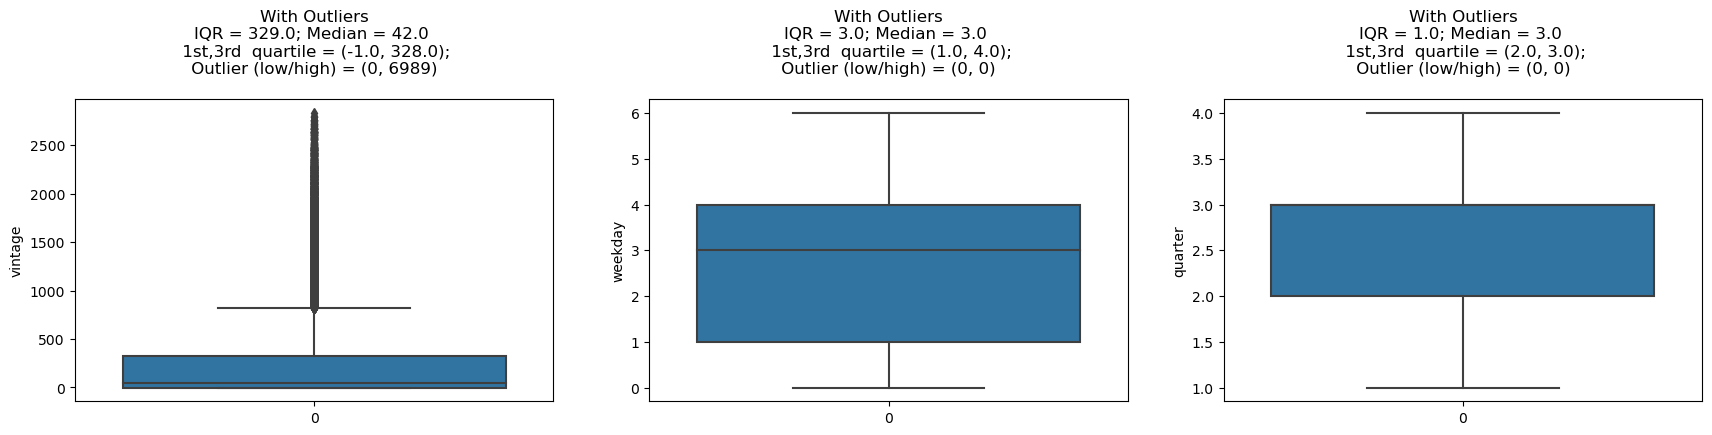

In [48]:
UVA_outlier(train,numeric[:3])

True
True
True


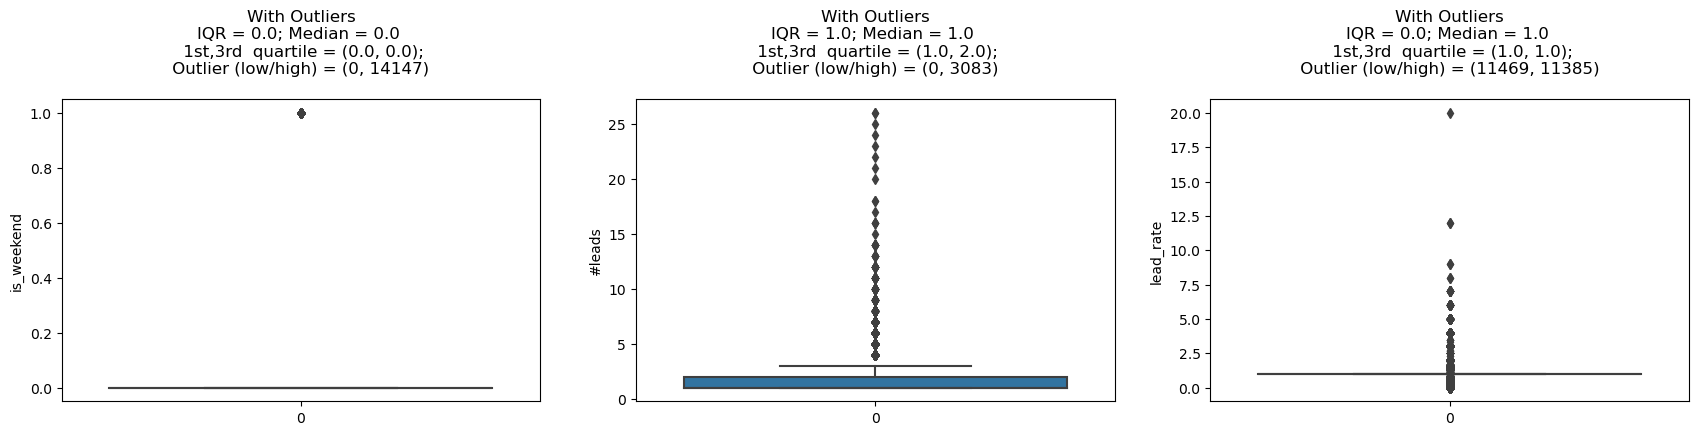

In [49]:
UVA_outlier(train,numeric[3:6])

True
True
True


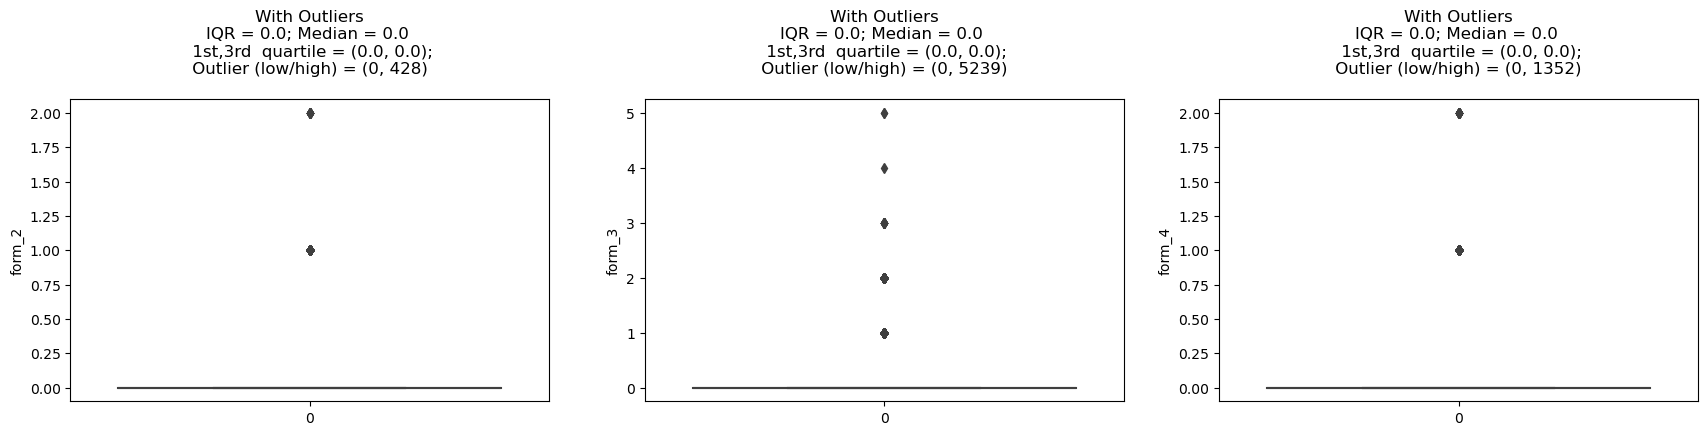

In [50]:
UVA_outlier(train,numeric[9:12])

True
True
True


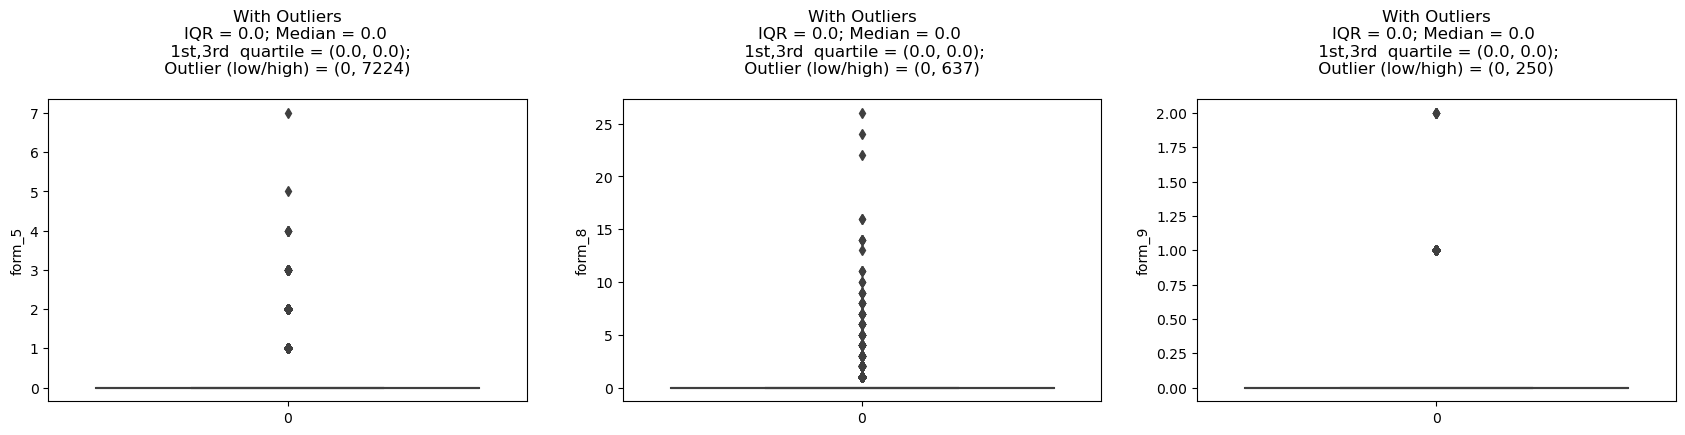

In [51]:
UVA_outlier(train,numeric[12:15])

True
True
True


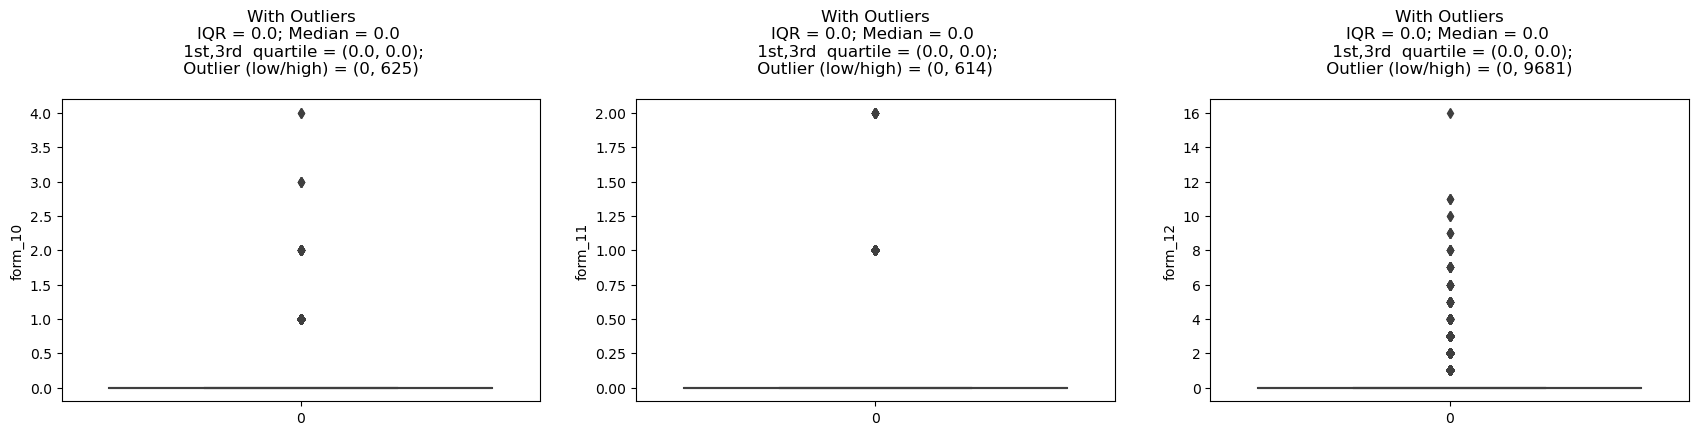

In [52]:
UVA_outlier(train,numeric[15:18])

True
True
True


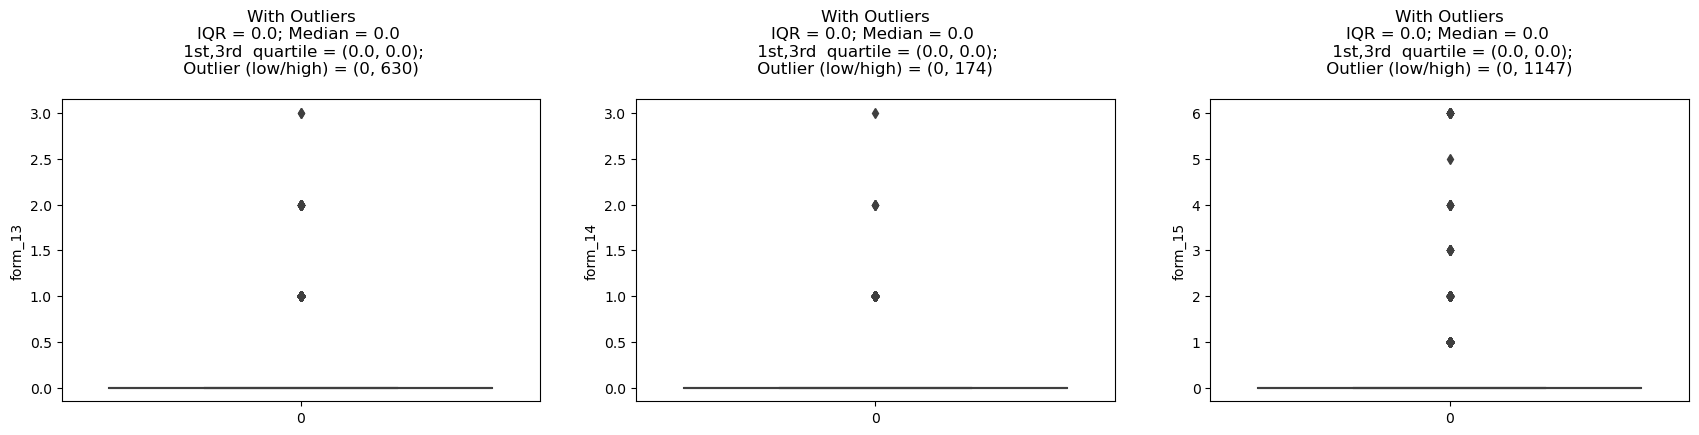

In [53]:
UVA_outlier(train,numeric[18:21])

True


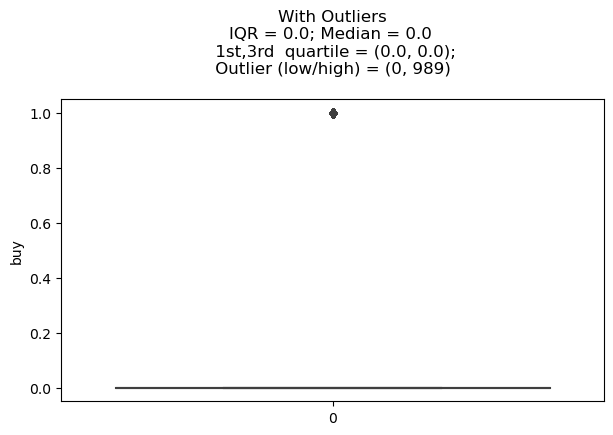

In [54]:
UVA_outlier(train,numeric[21:])

In [55]:
# train[train['buy12213']==0]

KeyError: 'buy12213'

In [ ]:
train['buy'].value_counts()

* I will solve the class imbalance problem by dropping rows from 

In [ ]:
# # Step 1: Calculate the count of each unique value
# counts = train['form_type'].value_counts()

# # Step 2: Find the highest and second highest counts
# highest_count = counts.max()
# second_highest_count = counts.nlargest(2).iloc[-1]

# # Step 3: Calculate the number of rows to be removed
# rows_to_remove = int(0.5 * (highest_count + second_highest_count))

# # # Step 4: Identify the rows with the highest and second highest counts
# rows_to_drop = train[train['form_type'].isin([highest_count, second_highest_count])]

# # # Step 5: Randomly select and remove the required number of rows
# # rows_to_drop = rows_to_drop.sample(rows_to_remove, random_state=42)
# # data = data.drop(rows_to_drop.index)

In [ ]:
# rows_to_remove

In [ ]:
# rows_to_drop=train[((train['form_type']=='form_6')|(train['form_type']=='form_7')) & (train['buy']==0)]
# rows_to_drop = rows_to_drop.sample(rows_to_remove, random_state=42)
# train = train.drop(rows_to_drop.index)

In [ ]:
# train

In [ ]:
# # Step 1: Calculate the count of each unique value
# counts = train['experience'].value_counts()

# # Step 2: Find the highest and second highest counts
# highest_count = counts.max()
# second_highest_count = counts.nlargest(2).iloc[-1]
# print(highest_count)
# print(second_highest_count)
# # Step 3: Calculate the number of rows to be removed
# rows_to_remove = int(0.5 * (highest_count + second_highest_count))
# print(rows_to_remove)
# # # Step 4: Identify the rows with the highest and second highest counts
# rows_to_drop = train[(((train['experience']=='Fresher') | (train['experience']=='0-3 years')) & (train['buy']==0))]
# print(rows_to_drop)
# # # Step 5: Randomly select and remove the required number of rows
# rows_to_drop = rows_to_drop.sample(rows_to_remove, random_state=42)
# train = train.drop(rows_to_drop.index)
    

In [ ]:
# train

In [ ]:
# # Step 1: Calculate the count of each unique value
# counts = train['utm_source'].value_counts()

# # Step 2: Find the highest and second highest counts
# highest_count = counts.max()
# second_highest_count = counts.nlargest(2).iloc[-1]
# print(highest_count)
# print(second_highest_count)
# # Step 3: Calculate the number of rows to be removed
# rows_to_remove = int(0.5 * (highest_count + second_highest_count))
# print(rows_to_remove)
# # # Step 4: Identify the rows with the highest and second highest counts
# rows_to_drop = train[(((train['utm_source']=='source_6') | (train['utm_source']=='source_4')) & (train['buy']==0))]
# print(rows_to_drop)
# # # Step 5: Randomly select and remove the required number of rows
# rows_to_drop = rows_to_drop.sample(rows_to_remove, random_state=42)
# train = train.drop(rows_to_drop.index)
    

In [ ]:
# train

In [ ]:
# train['buy'].value_counts().plot(kind = 'pie',figsize = (6,6), explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
# plt.title('buy Vs not Buy ')
# plt.legend(['not Buy','buy'])
# plt.show()

In [ ]:
train['buy'].value_counts()

In [ ]:
# # Step 1: Calculate the count of each unique value
# counts = train['utm_medium'].value_counts()

# # Step 2: Find the highest and second highest counts
# highest_count = counts.max()
# second_highest_count = counts.nlargest(2).iloc[-1]
# print(highest_count)
# print(second_highest_count)
# # Step 3: Calculate the number of rows to be removed
# rows_to_remove = int(0.5 * (highest_count + second_highest_count))
# print(rows_to_remove)
# # # Step 4: Identify the rows with the highest and second highest counts
# rows_to_drop = train[(((train['utm_medium']=='medium_6') | (train['utm_medium']=='medium_5')) & (train['buy']==0))]
# print(rows_to_drop)
# # # Step 5: Randomly select and remove the required number of rows
# rows_to_drop = rows_to_drop.sample(rows_to_remove, random_state=42)
# train = train.drop(rows_to_drop.index)
    

In [ ]:
#train

In [ ]:
#train['buy'].value_counts()

In [ ]:
# train

In [ ]:
# train['buy'].value_counts().plot(kind = 'pie',figsize = (6,6), explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
# plt.title('buy Vs not Buy ')
# plt.legend(['not Buy','buy'])
# plt.show()

In [ ]:
#UVA_category(train,category[:3])

In [ ]:
#UVA_category(train,category[3:6])

In [ ]:
#UVA_category(train,category[6:9])

In [ ]:
# # Step 1: Calculate the count of each unique value
# counts = train['subdomain'].value_counts()

# # Step 2: Find the highest and second highest counts
# highest_count = counts.max()

# print(highest_count)

# # Step 3: Calculate the number of rows to be removed
# rows_to_remove = int(0.5 * (highest_count))
# print(rows_to_remove)
# # # Step 4: Identify the rows with the highest and second highest counts
# rows_to_drop = train[(((train['subdomain']=='gmail')) & (train['buy']==0))]
# print(rows_to_drop)
# # # Step 5: Randomly select and remove the required number of rows
# rows_to_drop = rows_to_drop.sample(rows_to_remove, random_state=42)
# train = train.drop(rows_to_drop.index)

In [ ]:
# train

In [ ]:
# # Step 1: Calculate the count of each unique value
# counts = train['ext'].value_counts()

# # Step 2: Find the highest and second highest counts
# highest_count = counts.max()

# print(highest_count)

# # Step 3: Calculate the number of rows to be removed
# rows_to_remove = int(0.5 * (highest_count))
# print(rows_to_remove)
# # # Step 4: Identify the rows with the highest and second highest counts
# rows_to_drop = train[(((train['ext']=='com')) & (train['buy']==0))]
# print(rows_to_drop)
# # # Step 5: Randomly select and remove the required number of rows
# rows_to_drop = rows_to_drop.sample(rows_to_remove, random_state=42)
# train = train.drop(rows_to_drop.index)

In [ ]:
train

In [ ]:
# train['buy'].value_counts().plot(kind = 'pie',figsize = (6,6), explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
plt.title('buy Vs not Buy ')
plt.legend(['not Buy','buy'])
plt.show()

In [ ]:
#UVA_category(train,category[:3])

In [ ]:
#UVA_category(train,category[3:6])

In [ ]:
#UVA_category(train,category[6:9])

In [ ]:
t#rain['is_quarter_start'].value_counts()

In [ ]:
#train['is_quarter_end'].value_counts()

In [ ]:
# train['is_month_end'].value_counts()

In [ ]:
# train['is_month_start'].value_counts()

* Its clear that 99% of the data is not start or not the end and using low variance filter I can drop the column to deal with curse of dimensionality

In [ ]:
train['is_signedup'].value_counts()

* I have solved the problem class imbalance problem and by dropping the rows from data that predominantly occurring in the dataset
* we'll start building the model

In [ ]:
train.dtypes

In [ ]:
train

In [ ]:
train[train['buy12213']==0]

In [66]:
train.drop(['created_at'],axis=1,inplace=True)

In [67]:
train

,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,0.018609,0.932598,0.039439,0.141803,0.371557,0.060403,0.015706,0,-1,4,1,0,1,0,1,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.823219,0.932598,0.528584,0.004229,0.371557,0.060403,0.015706,1,0,4,1,0,1,0,1,0,1,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.823219,0.932598,0.528584,0.060486,0.371557,0.060403,0.007911,1,7,4,1,0,1,0,1,0,4,4.000000,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.823219,0.932598,0.528584,0.014645,0.371557,0.001957,0.000365,0,-1,4,1,0,1,0,1,0,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.823219,0.932598,0.102280,0.141803,0.371557,0.060403,0.015706,1,166,4,1,0,1,0,1,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,0.087553,0.033419,0.014031,0.347873,0.331785,0.335915,0.335915,0,-1,0,4,0,0,1,0,0,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60291,0.823219,0.932598,0.003997,0.060486,0.371557,0.335915,0.335915,1,123,0,4,0,0,1,0,0,2,0.060606,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
60292,0.823219,0.932598,0.528584,0.347873,0.331785,0.360776,0.363430,1,507,0,4,0,0,1,0,0,1,0.002421,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60293,0.823219,0.932598,0.528584,0.136744,0.331785,0.335915,0.335915,1,449,0,4,0,0,1,0,0,5,0.028090,0,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0


# model building
* its a small dataset which makes it a best candidate for Randomforest hence I am using Random forest also I have be careful about overfitting due to curse of dimensionality

In [57]:
category=category[:7]

In [58]:
category

['subdomain',
 'ext',
 'country_code',
 'form_type',
 'experience',
 'utm_source',
 'utm_medium']

In [59]:
for i in category:    
    # Calculate the frequency of each category
    category_frequency = train[i].value_counts(normalize=True)
    print(i)
    # Create a new column 'category_freq_enc' with the frequency encoding values
    train[i] = train[i].map(category_frequency)

subdomain
ext
country_code
form_type
experience
utm_source
utm_medium


In [60]:
train

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 07:26:01,0.018609,0.932598,0.039439,0.141803,0.371557,0.060403,0.015706,0,-1,4,1,0,1,0,1,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,0.823219,0.932598,0.528584,0.004229,0.371557,0.060403,0.015706,1,0,4,1,0,1,0,1,0,1,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,0.823219,0.932598,0.528584,0.060486,0.371557,0.060403,0.007911,1,7,4,1,0,1,0,1,0,4,4.000000,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,0.823219,0.932598,0.528584,0.014645,0.371557,0.001957,0.000365,0,-1,4,1,0,1,0,1,0,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,0.823219,0.932598,0.102280,0.141803,0.371557,0.060403,0.015706,1,166,4,1,0,1,0,1,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,2022-10-31 23:02:14,0.087553,0.033419,0.014031,0.347873,0.331785,0.335915,0.335915,0,-1,0,4,0,0,1,0,0,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60291,2022-10-31 23:09:39,0.823219,0.932598,0.003997,0.060486,0.371557,0.335915,0.335915,1,123,0,4,0,0,1,0,0,2,0.060606,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
60292,2022-10-31 23:33:23,0.823219,0.932598,0.528584,0.347873,0.331785,0.360776,0.363430,1,507,0,4,0,0,1,0,0,1,0.002421,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60293,2022-10-31 23:48:47,0.823219,0.932598,0.528584,0.136744,0.331785,0.335915,0.335915,1,449,0,4,0,0,1,0,0,5,0.028090,0,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0


# Model1 : with 60k records and all columns

In [68]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred_train = clf.predict(X_train)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_train,y_train))
print(accuracy_score(y_pred_train,y_train))

[[47464    52]
 [    1   719]]
0.9989012355916743


In [73]:
y_pred_test = clf.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_test,y_test))
print(accuracy_score(y_pred_test,y_test))

[[11833   218]
 [    8     0]]
0.9812588108466705


* clearly my model has overfitted

# model 2 with 60k records and 19 cols

In [75]:
Xtrain=train.iloc[:,:-1]


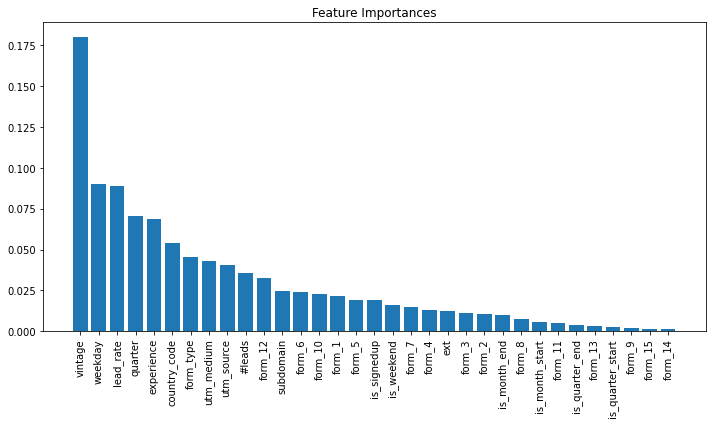

In [76]:

importances = clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = list(Xtrain.columns)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [77]:
train.drop(['is_weekend','form_7','form_2','form_4','form_3','is_month_end','is_month_start',
            'is_quarter_start','is_quarter_end','form_15','form_8','form_11','form_13','form_9','form_14'],
           axis=1,inplace=True)

In [79]:
train

,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,#leads,lead_rate,form_1,form_6,form_5,form_10,form_12,buy
0,0.018609,0.932598,0.039439,0.141803,0.371557,0.060403,0.015706,0,-1,4,1,1,1.000000,1,0,0,0,0,0
1,0.823219,0.932598,0.528584,0.004229,0.371557,0.060403,0.015706,1,0,4,1,1,1.000000,0,0,0,0,0,0
2,0.823219,0.932598,0.528584,0.060486,0.371557,0.060403,0.007911,1,7,4,1,4,4.000000,2,0,0,0,0,0
3,0.823219,0.932598,0.528584,0.014645,0.371557,0.001957,0.000365,0,-1,4,1,1,1.000000,0,0,0,0,0,0
4,0.823219,0.932598,0.102280,0.141803,0.371557,0.060403,0.015706,1,166,4,1,1,1.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,0.087553,0.033419,0.014031,0.347873,0.331785,0.335915,0.335915,0,-1,0,4,1,1.000000,0,1,0,0,0,0
60291,0.823219,0.932598,0.003997,0.060486,0.371557,0.335915,0.335915,1,123,0,4,2,0.060606,0,0,0,0,1,0
60292,0.823219,0.932598,0.528584,0.347873,0.331785,0.360776,0.363430,1,507,0,4,1,0.002421,0,1,0,0,0,0
60293,0.823219,0.932598,0.528584,0.136744,0.331785,0.335915,0.335915,1,449,0,4,5,0.028090,0,0,0,1,3,0


In [80]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred_train = clf.predict(X_train)

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_train,y_train))
print(accuracy_score(y_pred_train,y_train))

[[47464    52]
 [    1   719]]
0.9989012355916743


In [85]:
y_pred_test = clf.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_test,y_test))
print(accuracy_score(y_pred_test,y_test))

[[11833   218]
 [    8     0]]
0.9812588108466705


In [87]:
Xtrain=train.iloc[:,:-1]

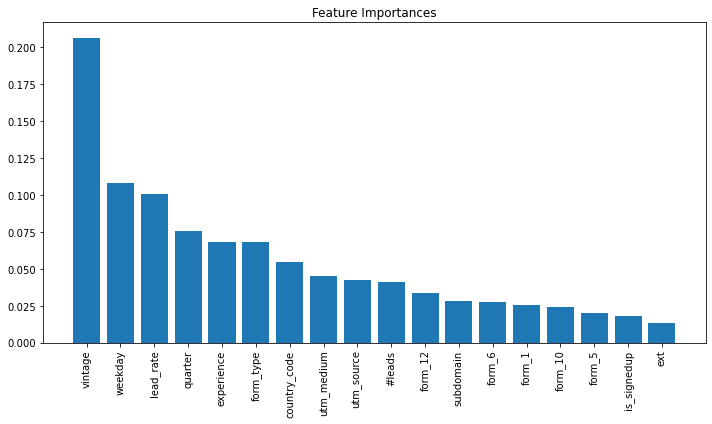

In [88]:
importances = clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = list(Xtrain.columns)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [89]:
train

,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,#leads,lead_rate,form_1,form_6,form_5,form_10,form_12,buy
0,0.018609,0.932598,0.039439,0.141803,0.371557,0.060403,0.015706,0,-1,4,1,1,1.000000,1,0,0,0,0,0
1,0.823219,0.932598,0.528584,0.004229,0.371557,0.060403,0.015706,1,0,4,1,1,1.000000,0,0,0,0,0,0
2,0.823219,0.932598,0.528584,0.060486,0.371557,0.060403,0.007911,1,7,4,1,4,4.000000,2,0,0,0,0,0
3,0.823219,0.932598,0.528584,0.014645,0.371557,0.001957,0.000365,0,-1,4,1,1,1.000000,0,0,0,0,0,0
4,0.823219,0.932598,0.102280,0.141803,0.371557,0.060403,0.015706,1,166,4,1,1,1.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,0.087553,0.033419,0.014031,0.347873,0.331785,0.335915,0.335915,0,-1,0,4,1,1.000000,0,1,0,0,0,0
60291,0.823219,0.932598,0.003997,0.060486,0.371557,0.335915,0.335915,1,123,0,4,2,0.060606,0,0,0,0,1,0
60292,0.823219,0.932598,0.528584,0.347873,0.331785,0.360776,0.363430,1,507,0,4,1,0.002421,0,1,0,0,0,0
60293,0.823219,0.932598,0.528584,0.136744,0.331785,0.335915,0.335915,1,449,0,4,5,0.028090,0,0,0,1,3,0


In [ ]:
train['buysdds'==0]

# model 3 with feature scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train.iloc[:, 7:-1] = sc.fit_transform(train.iloc[:, 7:-1])


In [91]:
train

,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,#leads,lead_rate,form_1,form_6,form_5,form_10,form_12,buy
0,0.018609,0.932598,0.039439,0.141803,0.371557,0.060403,0.015706,-1.245991,-0.589579,0.607854,-1.497866,-0.501025,-0.095655,1.451656,-0.861272,-0.353395,-0.097805,-0.369441,0
1,0.823219,0.932598,0.528584,0.004229,0.371557,0.060403,0.015706,0.802574,-0.587362,0.607854,-1.497866,-0.501025,-0.095655,-0.455762,-0.861272,-0.353395,-0.097805,-0.369441,0
2,0.823219,0.932598,0.528584,0.060486,0.371557,0.060403,0.007911,0.802574,-0.571840,0.607854,-1.497866,2.166856,3.906838,3.359073,-0.861272,-0.353395,-0.097805,-0.369441,0
3,0.823219,0.932598,0.528584,0.014645,0.371557,0.001957,0.000365,-1.245991,-0.589579,0.607854,-1.497866,-0.501025,-0.095655,-0.455762,-0.861272,-0.353395,-0.097805,-0.369441,0
4,0.823219,0.932598,0.102280,0.141803,0.371557,0.060403,0.015706,0.802574,-0.219278,0.607854,-1.497866,-0.501025,-0.095655,1.451656,-0.861272,-0.353395,-0.097805,-0.369441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,0.087553,0.033419,0.014031,0.347873,0.331785,0.335915,0.335915,-1.245991,-0.589579,-1.475126,1.404467,-0.501025,-0.095655,-0.455762,0.719706,-0.353395,-0.097805,-0.369441,0
60291,0.823219,0.932598,0.003997,0.060486,0.371557,0.335915,0.335915,0.802574,-0.314625,-1.475126,1.404467,0.388269,-1.348961,-0.455762,-0.861272,-0.353395,-0.097805,1.460013,0
60292,0.823219,0.932598,0.528584,0.347873,0.331785,0.360776,0.363430,0.802574,0.536847,-1.475126,1.404467,-0.501025,-1.426589,-0.455762,0.719706,-0.353395,-0.097805,-0.369441,0
60293,0.823219,0.932598,0.528584,0.136744,0.331785,0.335915,0.335915,0.802574,0.408239,-1.475126,1.404467,3.056149,-1.392343,-0.455762,-0.861272,-0.353395,8.587223,5.118920,0


In [92]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [94]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
y_pred_test = clf.predict(X_test)

In [96]:
y_pred_train = clf.predict(X_train)

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_train,y_train))
print(accuracy_score(y_pred_train,y_train))

[[41512    48]
 [    0   646]]
0.9988627209401507


In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_test,y_test))
print(accuracy_score(y_pred_test,y_test))

[[17782   293]
 [   12     2]]
0.9831389242080822


In [99]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# import numpy as np



# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest classifier
# clf = RandomForestClassifier()

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300,400,500],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 8,10,13,15]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Evaluate the model on the test set using the best parameters
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test set accuracy:", accuracy)

KeyboardInterrupt: 

In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features X and target variable y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9834148768554607
